# Exercises

### Exercise 1
---
Use the sklearn `make_blobs()` function, in the same way that we used in the lesson, to generate a *non linearly separable* dataset with 2 features.  
Fit a linear SVM to the dataset many times, varying the slack hyperparameter $C$, and calculate the model performance in classifying the data.  
What is, approximately, a the best value of the $C$ hyperparameter for this dataset?

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pickle
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})

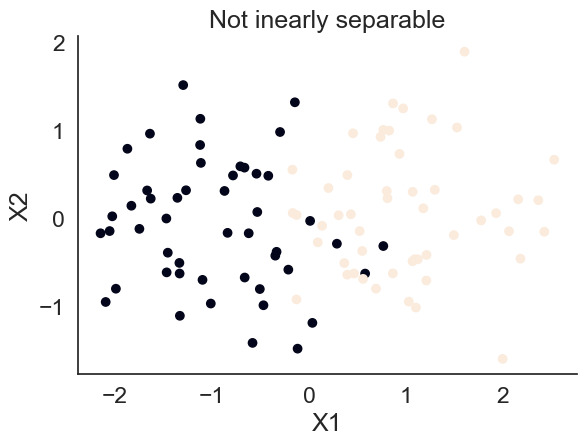

In [10]:
X_nsep,y_nsep = make_blobs(n_samples=100,n_features =2,centers=[[-1,0],[1,0]],cluster_std=.7)
plt.title('Not inearly separable')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X_nsep[:,0],X_nsep[:,1],c=y_nsep)
plt.tight_layout()

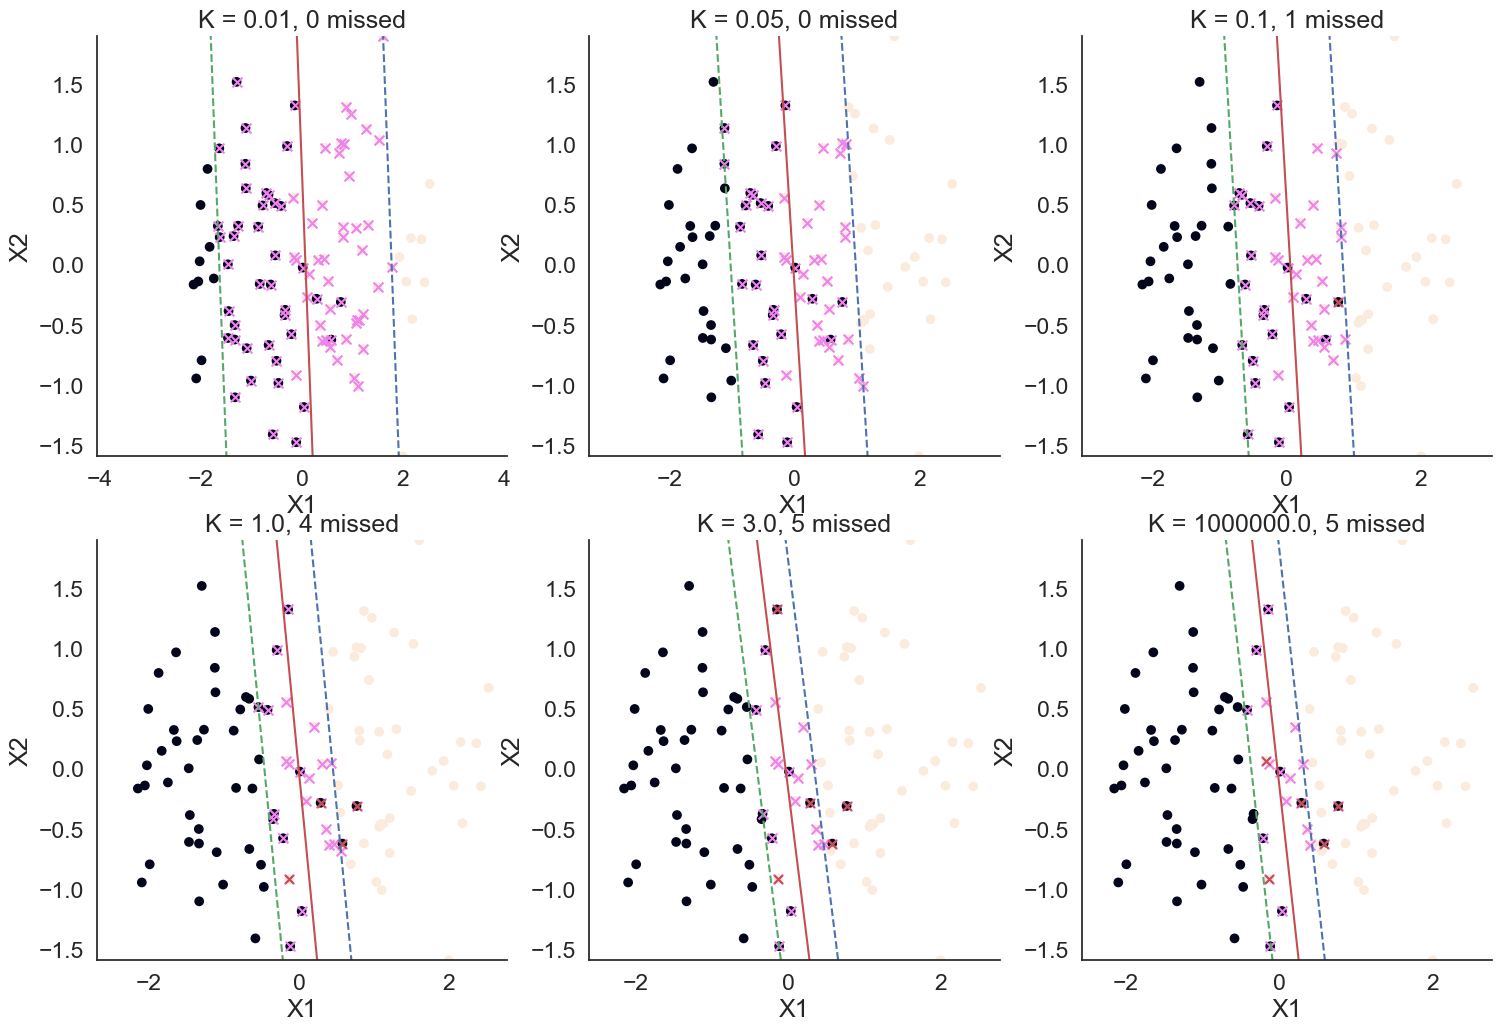

In [63]:
plt.figure(figsize=(18,12))
for i,C in enumerate([.01, .05, .1, 1., 3., 1e6]):   
    X,y = X_nsep,y_nsep
    svc_model = svm.SVC(kernel='linear',C=C);
    svc_model.fit(X, y)

    plt.subplot(2,3,i+1)

    plt.scatter(X[:,0],X[:,1],c=y_nsep)
    # Constructing a hyperplane using a formula.
    w = svc_model.coef_[0]           # w consists of 2 elements
    b = svc_model.intercept_[0]      # b consists of 1 element
    x_points = np.linspace(-2,2)    # generating x-points from -1 to 1
    y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
    # Plotting a red hyperplane
    plt.plot(x_points, y_points, c='r');
    # Encircle support vectors
    plt.scatter(svc_model.support_vectors_[:, 0],
                svc_model.support_vectors_[:, 1], 
                s=50, 
                c='violet',
                marker='x');
    # Step 2 (unit-vector):
    w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))
    # Step 3 (margin):
    margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))
    # Step 4 (calculate points of the margin lines):
    decision_boundary_points = np.array(list(zip(x_points, y_points)))
    points_of_line_above = decision_boundary_points + w_hat * margin
    points_of_line_below = decision_boundary_points - w_hat * margin
    # Plot margin lines
    # Blue margin line above
    plt.plot(points_of_line_above[:, 0], 
            points_of_line_above[:, 1], 
            'b--')
    # Green margin line below
    plt.plot(points_of_line_below[:, 0], 
            points_of_line_below[:, 1], 
            'g--')

    plt.ylim([min(X[:,1]),max(X[:,1])])

    plt.xlabel('X1')
    plt.ylabel('X2')
    counter = 0
    for i in range(X.shape[0]):
        test = ((2*y[i]-1)*(np.dot(w, X[i,:])+b)+margin <0)
        if test:
            counter += 1
            plt.scatter(X[i,0], X[i,1], marker = 'x', c = 'r')

    plt.title(f"K = {C}, {counter} missed")


There is no clear metric for the performance. One possible metric would be to find the largest regularization parameter for the slack, such that there are still no missclassified points outside the margin. This, seems to be close to C = 0.1 for this dataset. However, there seems to be a small bug in the computation of the margin as it seems smaller than the distance of the dashed lines from the boundary.

### Exercise 2
---
Repeat exercise 1, but using a non-linear SVM model (the sklearn class `SVC` uses [Radial Basis Functions](https://en.wikipedia.org/wiki/Radial_basis_function) as a default, check its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)). 
To have a fairer assessment of the performance, train the model on a fraction (e.g. 80%) of the data, and test it on the other 20%.
Compare the performance of a linear SVC and a RBF SVC for dataset that are increaslingly non-linearly-separable.


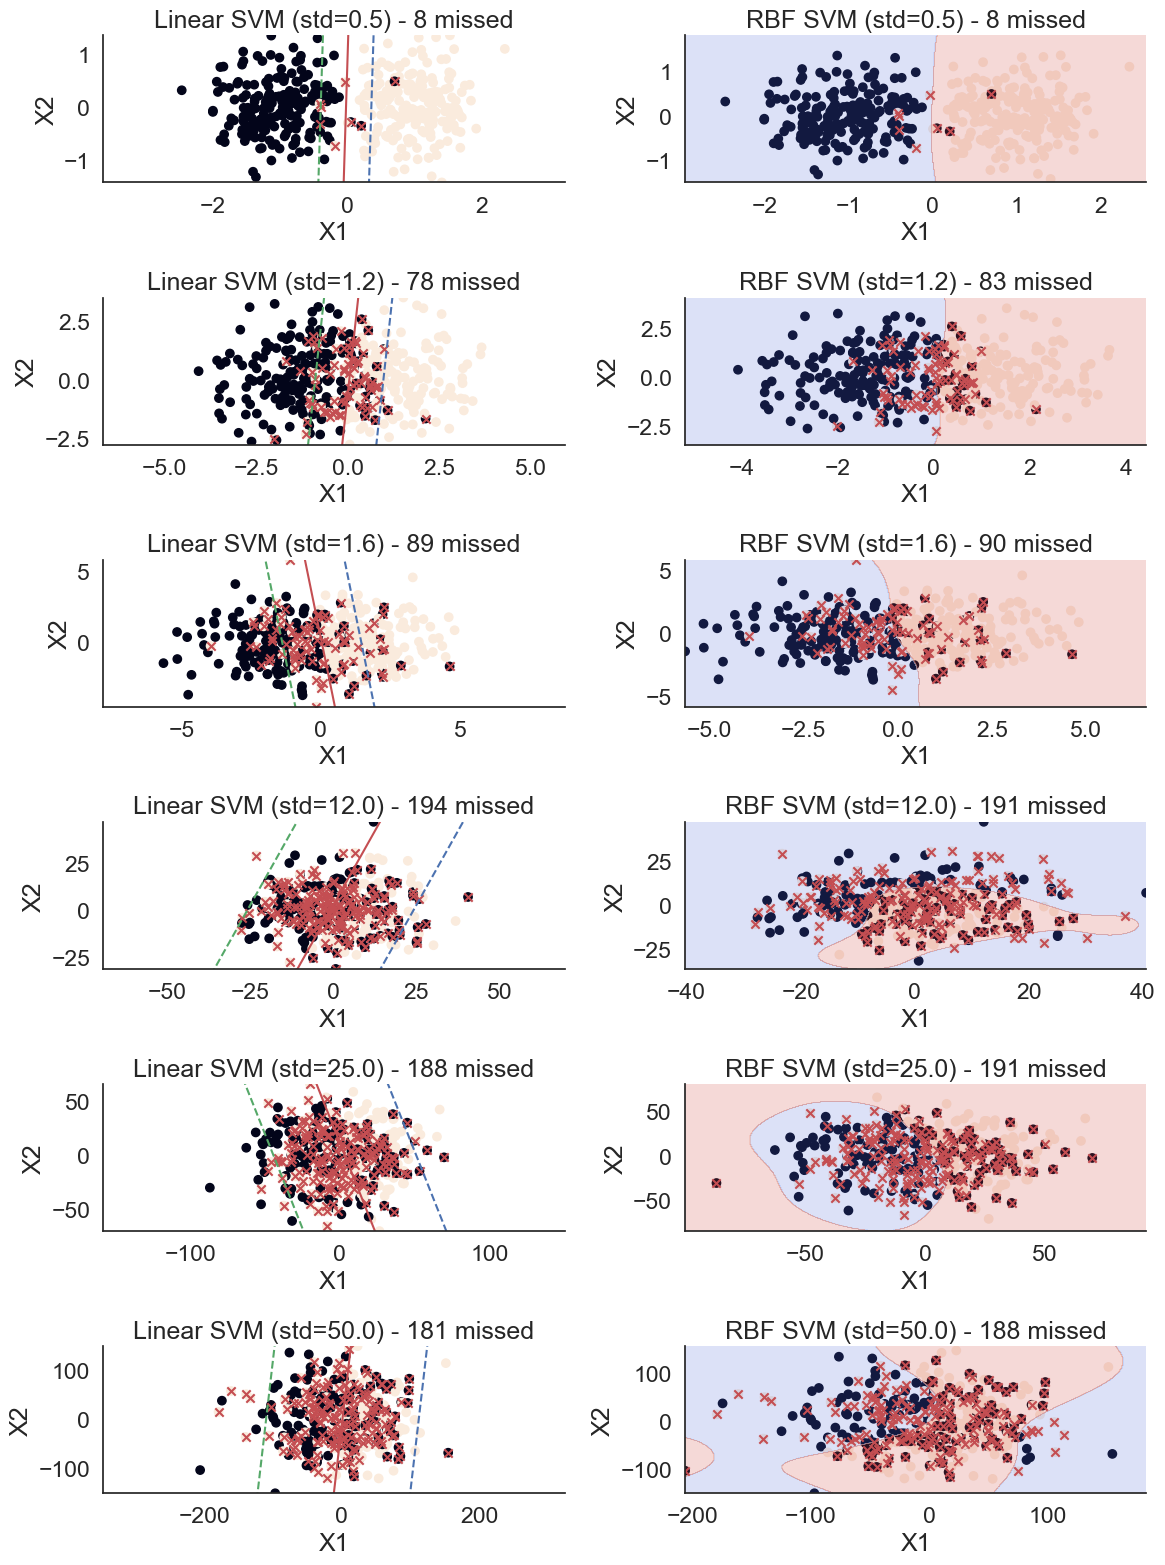

In [88]:
plt.figure(figsize=(12, 16))

for i, std in enumerate([0.5, 1.2, 1.6, 12.0, 25., 50.]):
    X_nsep, y_nsep = make_blobs(n_samples=2000, n_features=2, centers=[[-1, 0], [1, 0]], cluster_std=std)
    X, y = X_nsep, y_nsep
    C = 0.1
    svc_model = svm.SVC(kernel='linear', C=C)
    svc_SVC = svm.SVC(C=C)  # RBF kernel by default
    indices_used = np.sort(np.random.choice(2000, 1600, replace= False))
    svc_model.fit(X, y)
    svc_SVC.fit(X[indices_used], y[indices_used])

    X = np.delete(X, indices_used, axis = 0)
    y = np.delete(y, indices_used, axis = 0)

    ### Left Plot: Linear SVM ###
    plt.subplot(6, 2, 2 * i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y)

    # Decision boundary
    w = svc_model.coef_[0]
    b = svc_model.intercept_[0]
    x_points = np.linspace(np.min(X_nsep[:,0]), np.max(X_nsep[:,0]))
    y_points = -(w[0] / w[1]) * x_points - b / w[1]
    plt.plot(x_points, y_points, c='r')

    # Support vectors
    # plt.scatter(svc_model.support_vectors_[:, 0],
    #             svc_model.support_vectors_[:, 1],
    #             s=50,
    #             c='violet',
    #             marker='x')

    w_hat = w / np.linalg.norm(w)
    margin = 1 / np.linalg.norm(w)
    decision_boundary_points = np.array(list(zip(x_points, y_points)))
    points_above = decision_boundary_points + w_hat * margin
    points_below = decision_boundary_points - w_hat * margin
    plt.plot(points_above[:, 0], points_above[:, 1], 'b--')
    plt.plot(points_below[:, 0], points_below[:, 1], 'g--')

    counter = 0
    for j in range(X.shape[0]):
        test = ((2 * y[j] - 1) * (np.dot(w, X[j, :]) + b) < 0)
        if test:
            counter += 1
            plt.scatter(X[j, 0], X[j, 1], marker='x', c='r')

    plt.ylim([min(X[:, 1]), max(X[:, 1])])
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f"Linear SVM (std={std}) - {counter} missed")

    plt.subplot(6, 2, 2 * i + 2)
    plt.scatter(X[:, 0], X[:, 1], c=y)

    # Plot decision regions
    xx, yy = np.meshgrid(np.linspace(np.min(X_nsep[:,0]), np.max(X_nsep[:,0]), 500), np.linspace(np.min(X_nsep[:,1]), np.max(X_nsep[:,1]), 500))
    Z = svc_SVC.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

    # Support vectors
    # plt.scatter(svc_SVC.support_vectors_[:, 0],
    #             svc_SVC.support_vectors_[:, 1],
    #             s=50,
    #             c='black',
    #             marker='x')

    # Highlight misclassified points
    y_pred = svc_SVC.predict(X)
    missed = y_pred != y
    plt.scatter(X[missed, 0], X[missed, 1], marker='x', c='r')

    plt.ylim([min(X_nsep[:, 1]), max(X_nsep[:, 1])])
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f"RBF SVM (std={std}) - {missed.sum()} missed")

plt.tight_layout()
plt.show()

    


Interestingly the RBF method does not generally outperform the linear classification on this dataset.

### Exercise 3
---
Use the code below to simulate new data.
Generate data and then decode the stimulus identity, see how the decoding performance change when you change the following:

- The amplitude of the noise in the firing rate
- The amplitude of the stimulus modulation of the firing rate
- The number of neurons

Plot and comment.

## Useful code
---


In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [89]:
def generate_data(n_cells, a_noise, a_stim):
    # generate baseline rates from exponential distirbution
    average_firing_rate = 5; # average firing rate across the population
    n_stim_type = 2; # number of different stimuli
    cell_rate_baseline = np.random.exponential(average_firing_rate,size=n_cells)

    # create stimulus average responses, perturbing the population firng rate profile
    # we use a multiplicative modulation in opposite directions for the two stimuli
    modulation = a_stim*np.random.normal(0,1,size=n_cells)
    cell_rate_stim = {1: cell_rate_baseline * (1+modulation),2:cell_rate_baseline * (1-modulation)}
    # sets negative firng rate to 0
    cell_rate_stim[1][cell_rate_stim[1]<0]=0
    cell_rate_stim[2][cell_rate_stim[2]<0]=0
    # simulate spiking activity

    s_rate = 10000 # the sampling rate of our emulated recording system
    n_stim = 100 # number of stimuli

    stim_dur = 2 #stimulus duration (in seconds)
    is_interval = 3 # interval between stimuli  (in seconds)

    stim_onsets = np.arange(0,n_stim*(stim_dur+is_interval),(stim_dur+is_interval)) # onset time of each stimulus (in seconds)
    stim_type = np.asarray([1 for i in range(int(n_stim/2))]+[2 for i in range(int(n_stim/2))]) # identity of each stimulus
    np.random.shuffle(stim_type)

    time = np.arange(0,(n_stim+1)*(stim_dur+is_interval),1.0/s_rate) # vector of the sampled times.

    spike_times = []
    for cell in range(n_cells):
        spikes = np.random.poisson(cell_rate_baseline[cell]/s_rate,size=time.shape)
        for i,stimulus in enumerate(stim_type):
            stim_idxs = np.arange(stim_onsets[i]*s_rate,(stim_onsets[i]+stim_dur)*s_rate)
            spikes[stim_idxs] = np.random.poisson((cell_rate_stim[stimulus][cell]+a_noise)/s_rate,size=stim_idxs.shape)

        spike_times.append(time[spikes>0])
    # save ouput
    out_dict = {'spike_times':spike_times,
                'stim_onsets':stim_onsets,
                'stim_type':stim_type,
                'stim_duration':stim_dur
                }
    file_name = 'data/simulated_data_n'+str(n_cells)+'_an'+str(a_noise)+'_as'+str(a_stim)+'.pickle'
    with open(file_name, 'wb') as handle:
        pickle.dump(out_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [91]:
def analyze_data(file_name):       
        # import data
        with open(file_name, 'rb') as handle:
                data = pickle.load(handle)

        spike_times = data['spike_times']
        stim_onsets = data['stim_onsets']
        stim_type = data['stim_type']
        stim_duration = data['stim_duration']
        onset = -1 # in seconds before stimulus onset
        offset = 1 # in second after stimulus offset

        binwidth = 0.1 # in seconds (100 ms)
        bins = np.arange(onset,stim_duration+offset+binwidth,binwidth)
        onset = 1 # in seconds before stimulus onset
        offset = 1 # in second after stimulus offset

        binwidth = 0.1 # in seconds (100 ms)
        bins = np.arange(-onset,stim_duration+offset+binwidth,binwidth)

        n_cells = len(spike_times)
        n_trials= len(stim_type)

        X = np.zeros((n_cells,n_trials,len(bins)-1));
        for cell in range(n_cells):    
                for trial in range(n_trials):

                        # selects spikes that are in trial
                        sp_idx = np.logical_and(spike_times[cell]>stim_onsets[trial]-onset,
                                spike_times[cell]<stim_onsets[trial]+stim_duration+offset)
                        
                        # centers spike times around stimulus onset
                        sp_cntr = spike_times[cell][sp_idx]-stim_onsets[trial]
                        #bins spikes
                        spike_count,_ = np.histogram(sp_cntr,bins)
                        #spike_count = zscore(spike_count)
                        X[cell,trial,:] = spike_count

        neuron = 3
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.title('Sound A')
        sns.heatmap(X[neuron][stim_type==1],cmap=plt.cm.jet)
        plt.axvline(x=10,c='r',linewidth=3)
        plt.axvline(x=30,c='r',linewidth=3)
        plt.xlabel('time bin')
        plt.ylabel('stimulus presentation')

        plt.subplot(1,2,2)
        plt.title('Sound B')
        sns.heatmap(X[neuron][stim_type==2],cmap=plt.cm.jet)
        plt.axvline(x=10,c='r',linewidth=3)
        plt.axvline(x=30,c='r',linewidth=3)
        plt.xlabel('time bin')
        plt.ylabel('stimulus presentation')

        plt.tight_layout()
        plt.show()


        n_splits = 5

        avg_performance = []
        std_performance = []

        for time_bin in range(X.shape[-1]):
                # setting 2-fold cross validation
                kf = StratifiedKFold(n_splits=n_splits,shuffle=True)
                fold_performance = []

                for train_index, test_index in kf.split(X[:,:,time_bin].T,stim_type):
                        

                        X_train, X_test = X[:,train_index,time_bin].T, X[:,test_index,time_bin].T
                        y_train, y_test = stim_type[train_index], stim_type[test_index]

                        clf = svm.LinearSVC(max_iter=1000)
                        clf.fit(X_train, y_train)
                        fold_performance.append(clf.score(X_test,y_test))

                avg_performance.append(np.mean(fold_performance))
                std_performance.append(np.std(fold_performance))

        avg_performance = np.asarray(avg_performance)
        std_performance = np.asarray(std_performance)

        bin_centers = [(bins[i+1]+bins[i])/2 for i in range(len(bins)-1)]
        plt.plot(bin_centers,avg_performance)
        plt.fill_between(bin_centers,avg_performance-std_performance,
                        avg_performance+std_performance,alpha=0.2)

        plt.axhline(y=0.5,linestyle='--',label='chance level')
        plt.axvline(x=0,c='r')
        plt.axvline(x=2,c='r')

        plt.legend()
        plt.xlabel('Time (s)')
        plt.ylabel('Decoding performance')
        plt.show()

        from tqdm import tqdm 

        n_shuffles = 100 # number of surrogates for each bin
        performance = []
        surrogate_performance = []
        for time_bin in tqdm(range(X.shape[-1])):
                # setting 2-fold cross validation
                kf = StratifiedKFold(n_splits=2)
                fold_performance = []
                surrogate_fold_performance = []

                for train_index, test_index in kf.split(X[:,:,time_bin].T,stim_type):
                # print(f'Computing time bin {time_bin}/{X.shape[-1]}')

                        X_train, X_test = X[:,train_index,time_bin].T, X[:,test_index,time_bin].T
                        y_train, y_test = stim_type[train_index], stim_type[test_index]

                        clf = svm.LinearSVC(loss='hinge')
                        clf.fit(X_train, y_train)
                        fold_performance.append(clf.score(X_test,y_test))


                        for s in tqdm(range(n_shuffles), disable=True):
                                stim_type_shuff = np.random.permutation(stim_type)
                                y_train_shuff, y_test_shuff = stim_type_shuff[train_index], stim_type_shuff[test_index]
                                clf = svm.LinearSVC(loss='hinge')
                                clf.fit(X_train, y_train_shuff)
                                surrogate_fold_performance.append(clf.score(X_test,y_test_shuff))


                performance.append(np.mean(fold_performance))
                surrogate_performance.append(surrogate_fold_performance)

        performance = np.asarray(performance)
        surrogate_performance = np.asarray(surrogate_performance)

        plt.figure(figsize=(10,5))

        # Plot for bin 0
        plt.subplot(1,2,1)
        sns.histplot(surrogate_performance[0],bins=15,label='Shuff data')
        plt.axvline(x=performance[0],c='r',label='observed')
        plt.xlabel('Performance')
        sns.despine()
        plt.legend()

        # Plot for bin 20 
        plt.subplot(1,2,2)
        sns.histplot(surrogate_performance[20],bins=15,label='Shuff data')
        plt.axvline(x=performance[20],c='r',label='observed')
        plt.xlabel('Performance')
        sns.despine()
        plt.legend()
        plt.show()

        mean_shuff = np.mean(surrogate_performance,axis=-1)
        std_shuff = np.std(surrogate_performance,axis=-1)
        plt.plot(bins[:-1],performance)
        plt.fill_between(bins[:-1],mean_shuff-std_shuff,mean_shuff+std_shuff,alpha=0.3)
        plt.plot(bins[:-1],mean_shuff)
        plt.show()

In [92]:
n_cells = [20,50,100]
a_noise = [0., 0.1, 0.5]
a_stim = [.5, 1., 2.]

for n in n_cells:
    for a in a_noise:
        for s in a_stim:
            generate_data(n, a, s)



n_cells = 20, noise amplitude = 0.0, stim amplitude = 0.5


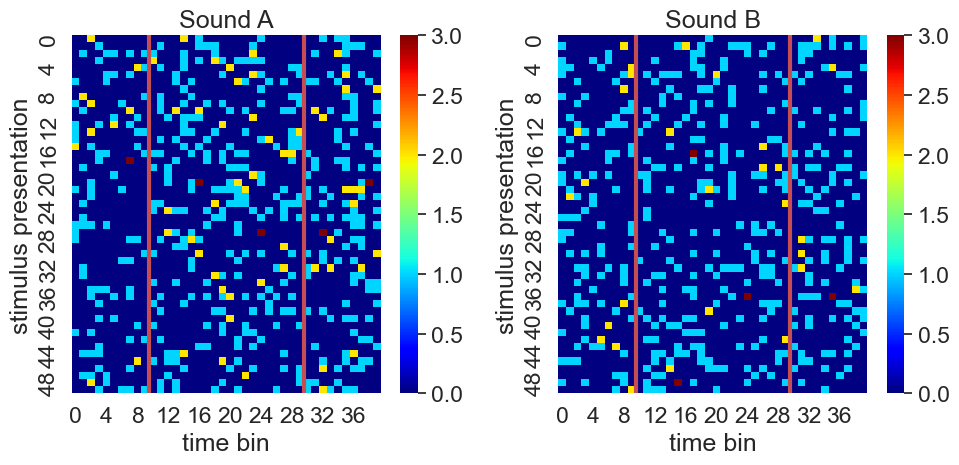

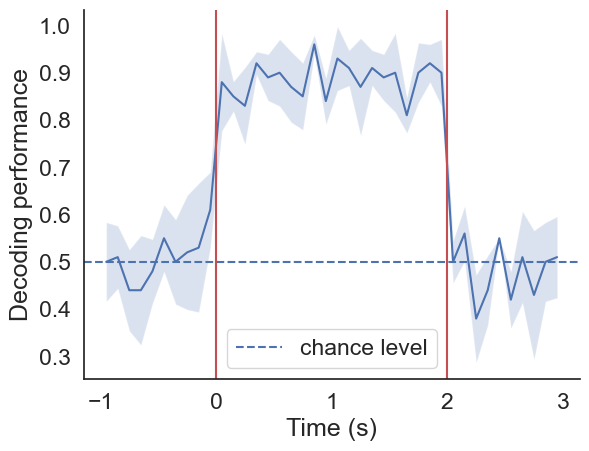

100%|██████████| 40/40 [00:05<00:00,  6.81it/s]


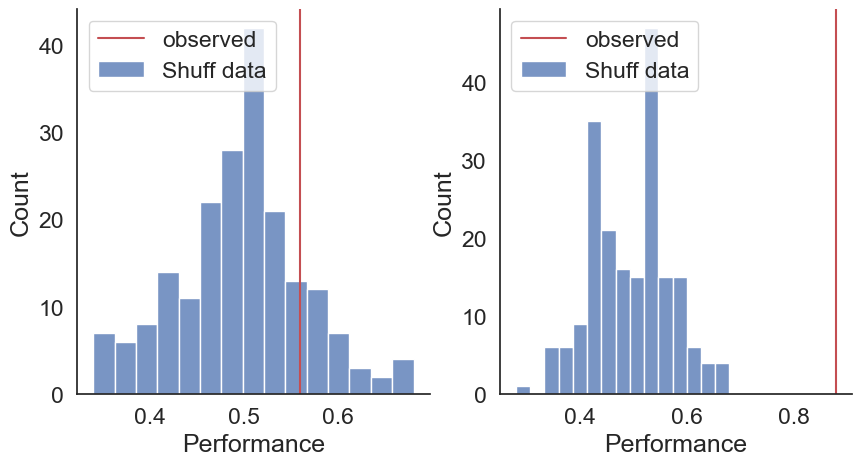

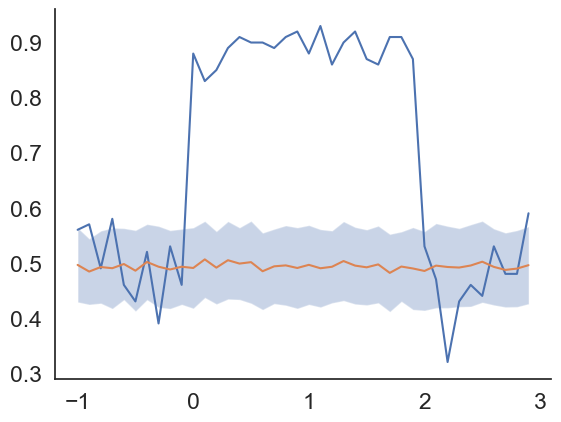

n_cells = 20, noise amplitude = 0.0, stim amplitude = 1.0


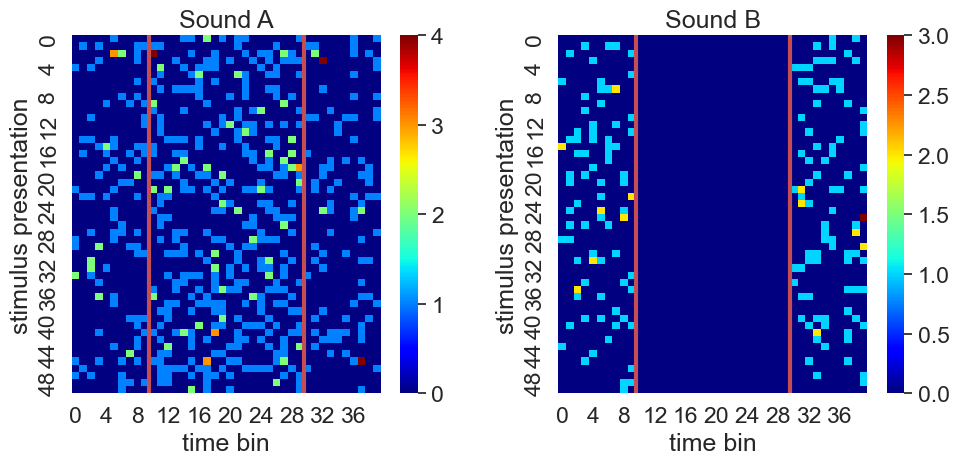

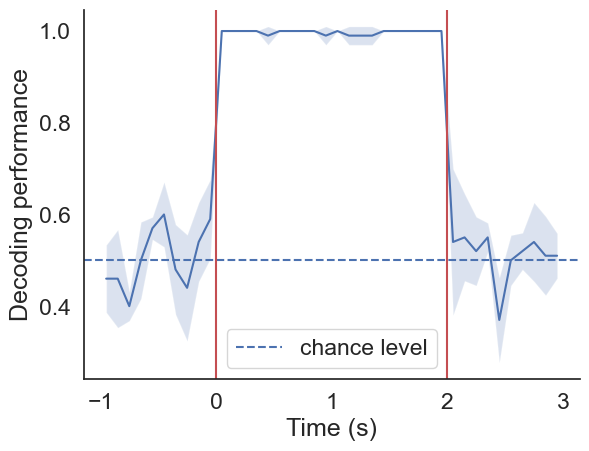

100%|██████████| 40/40 [00:06<00:00,  6.22it/s]


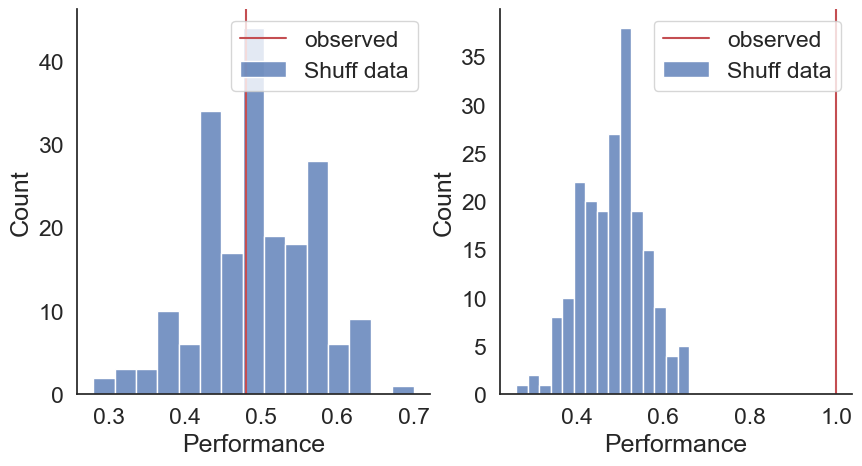

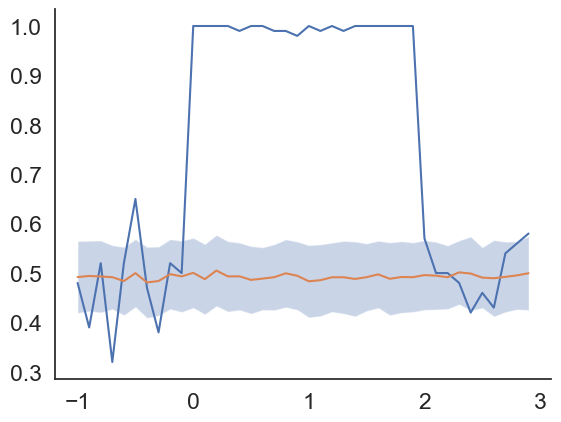

n_cells = 20, noise amplitude = 0.0, stim amplitude = 2.0


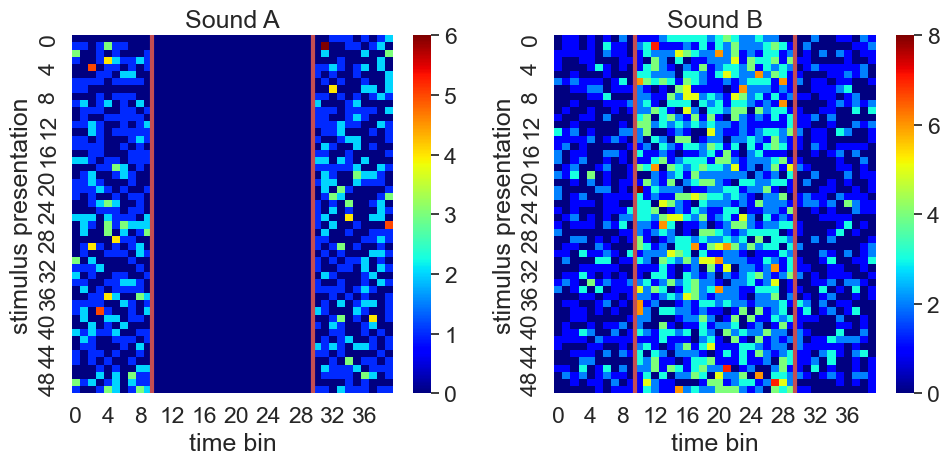

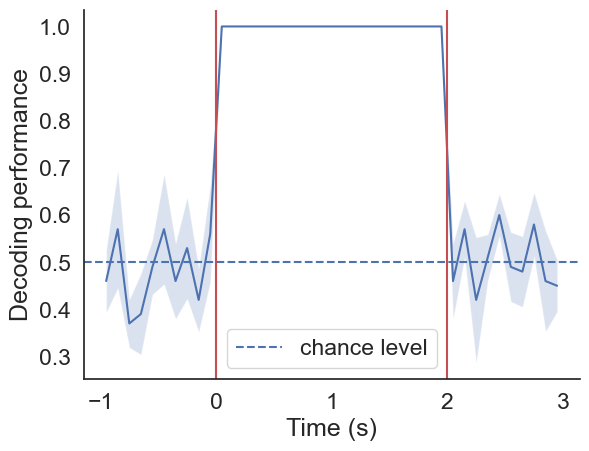

100%|██████████| 40/40 [00:06<00:00,  5.93it/s]


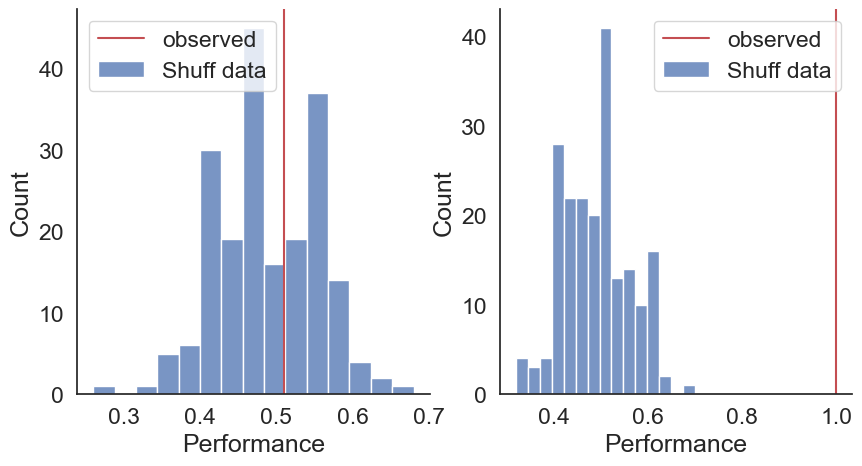

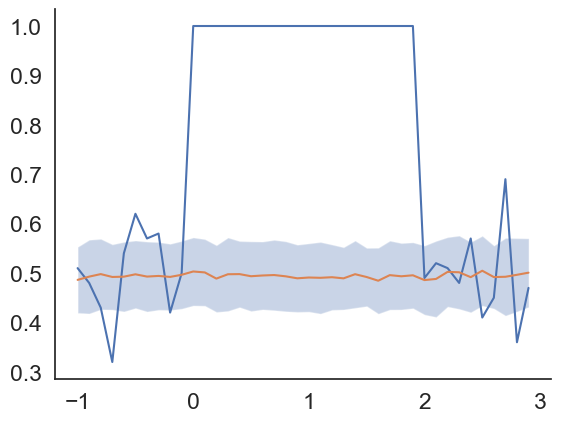

n_cells = 20, noise amplitude = 0.1, stim amplitude = 0.5


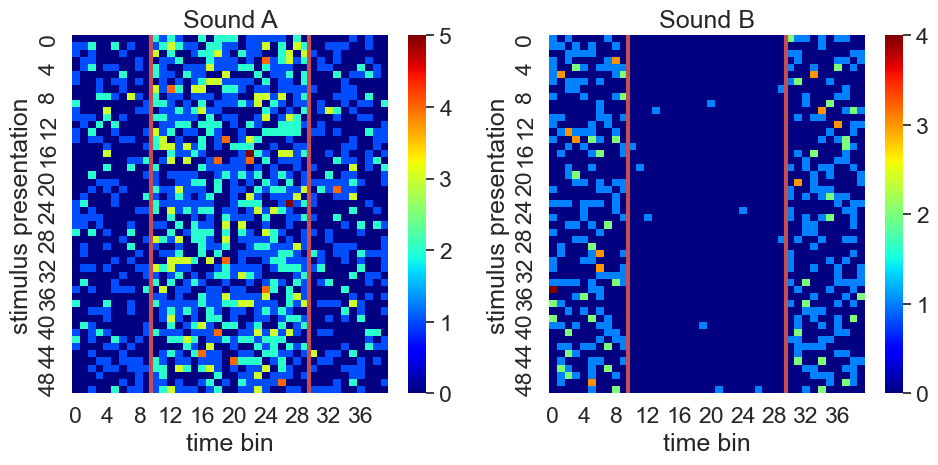

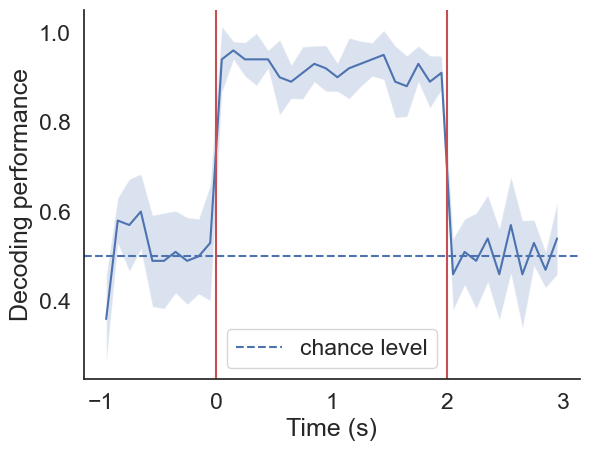

100%|██████████| 40/40 [00:06<00:00,  5.84it/s]


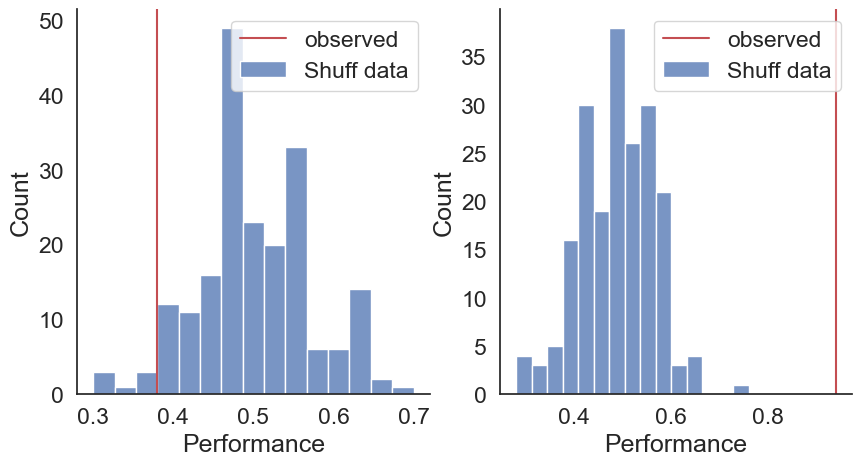

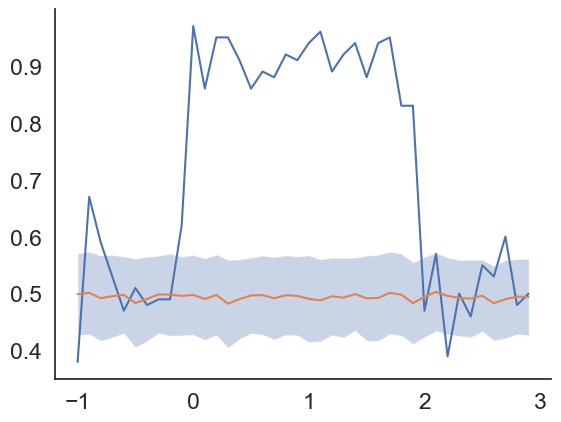

n_cells = 20, noise amplitude = 0.1, stim amplitude = 1.0


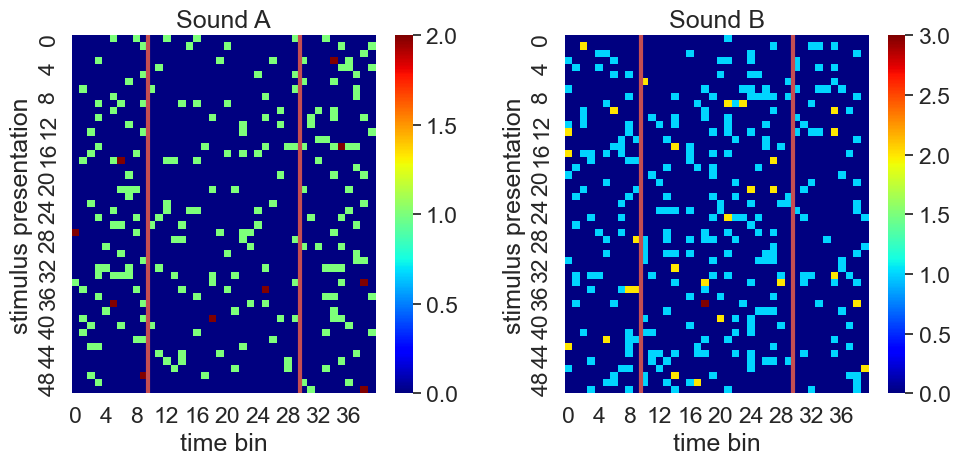

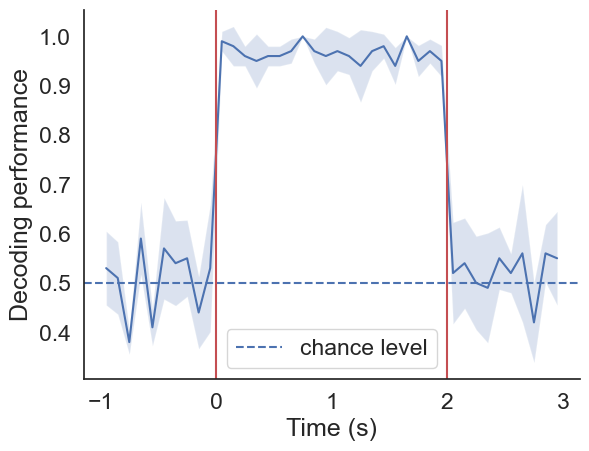

100%|██████████| 40/40 [00:06<00:00,  6.66it/s]


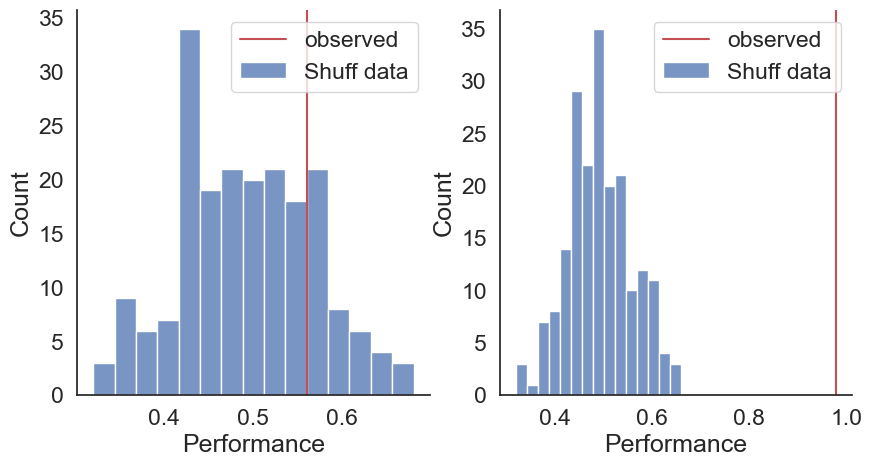

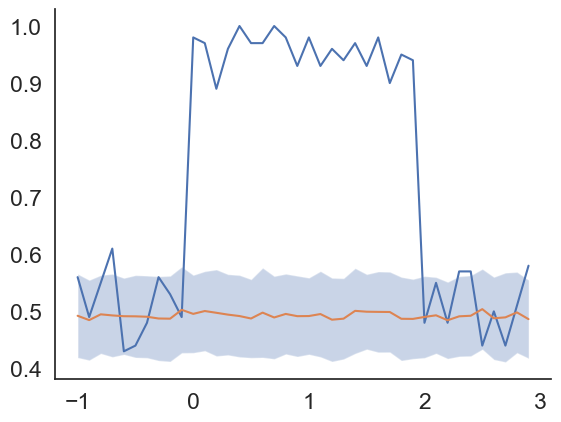

n_cells = 20, noise amplitude = 0.1, stim amplitude = 2.0


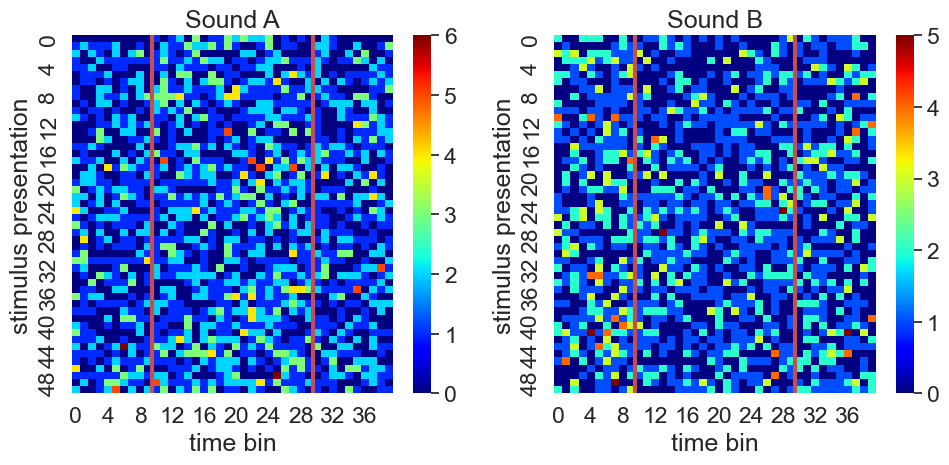

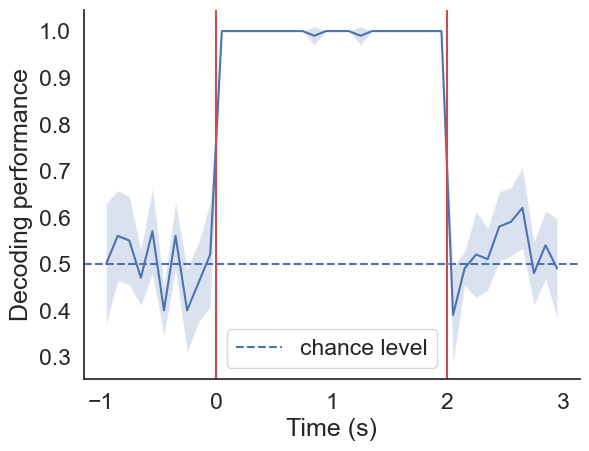

100%|██████████| 40/40 [00:07<00:00,  5.70it/s]


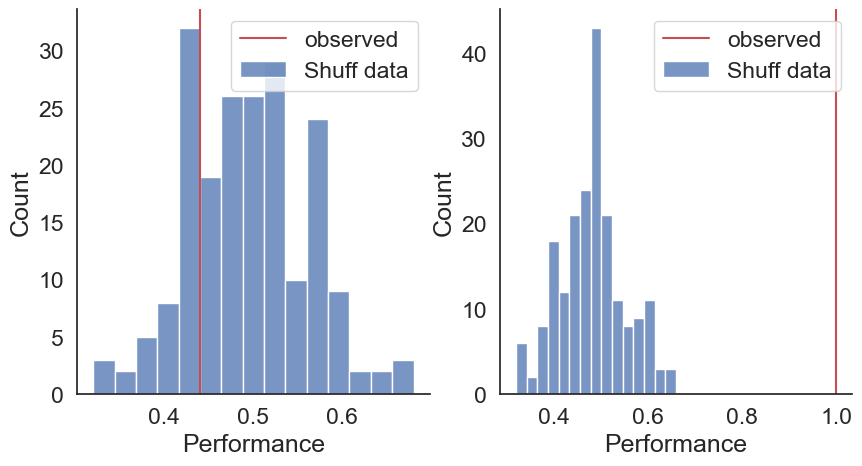

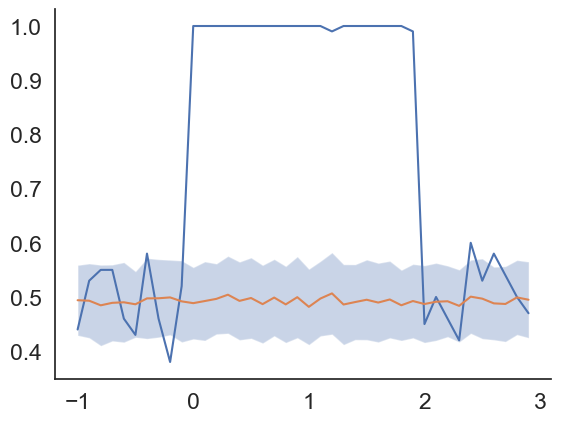

n_cells = 20, noise amplitude = 0.5, stim amplitude = 0.5


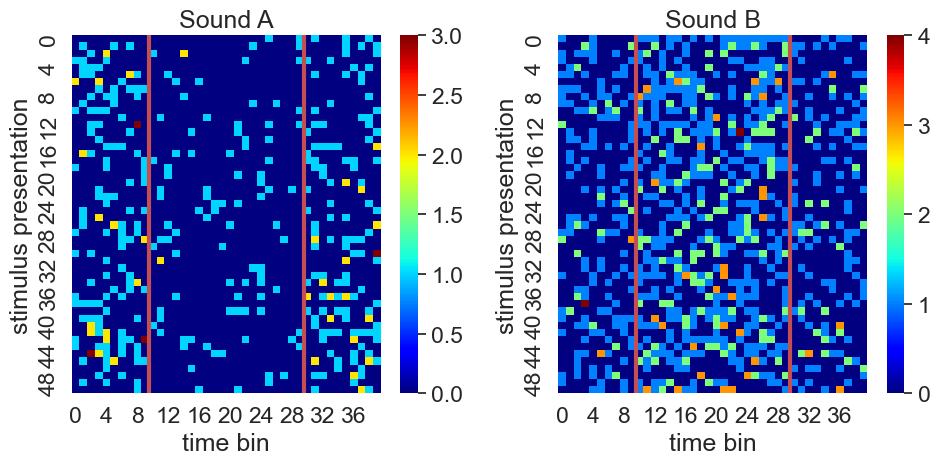

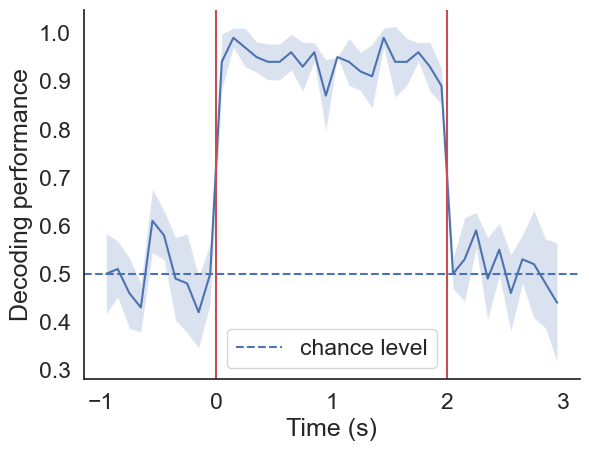

100%|██████████| 40/40 [00:06<00:00,  6.39it/s]


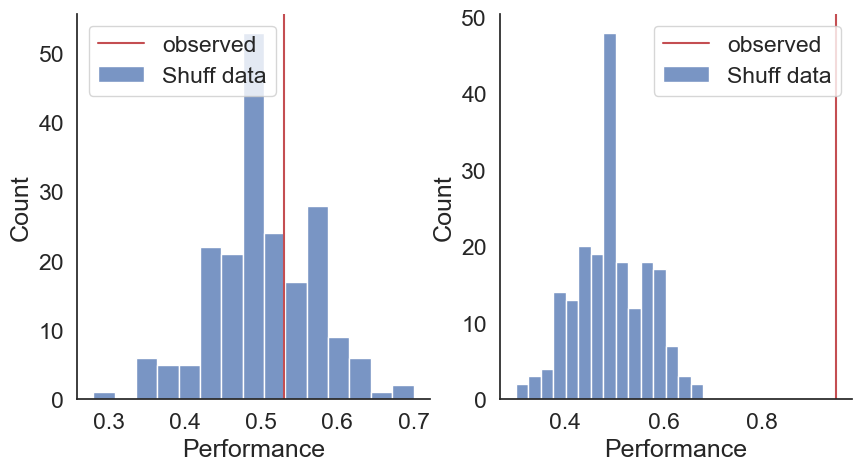

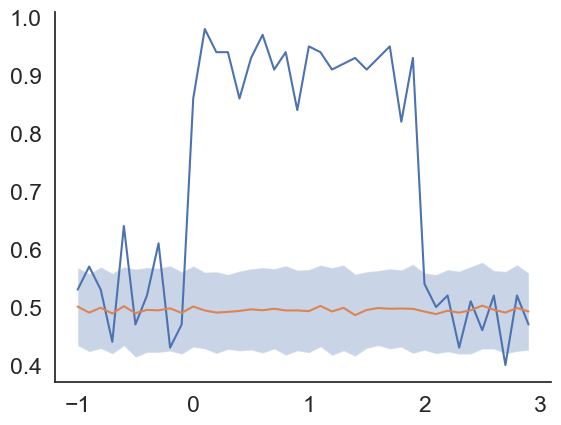

n_cells = 20, noise amplitude = 0.5, stim amplitude = 1.0


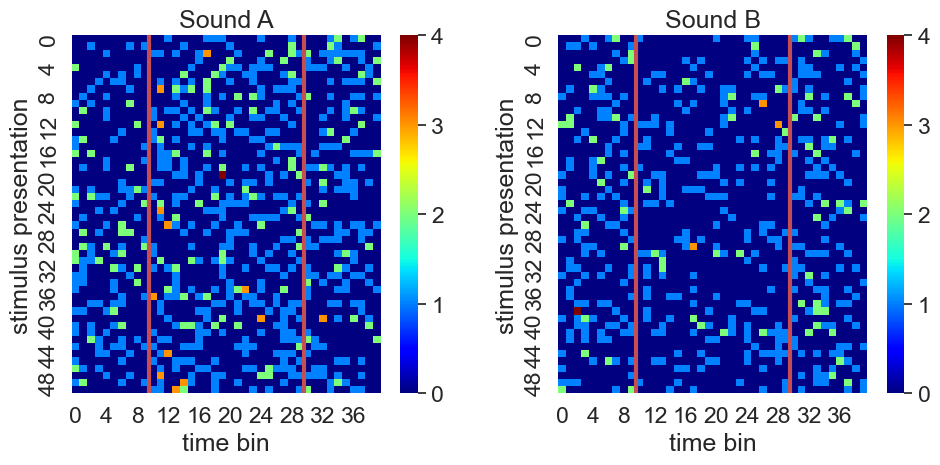

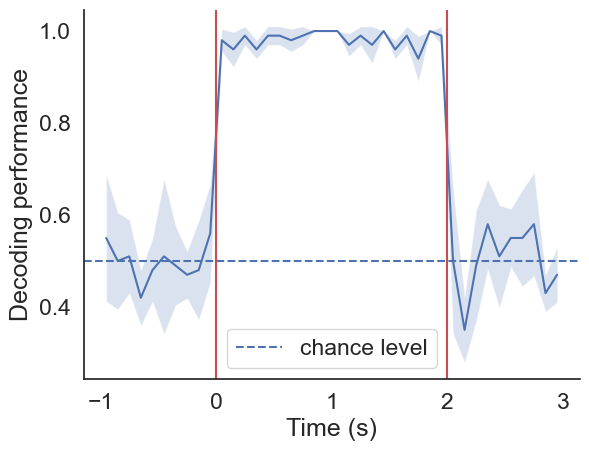

100%|██████████| 40/40 [00:06<00:00,  5.98it/s]


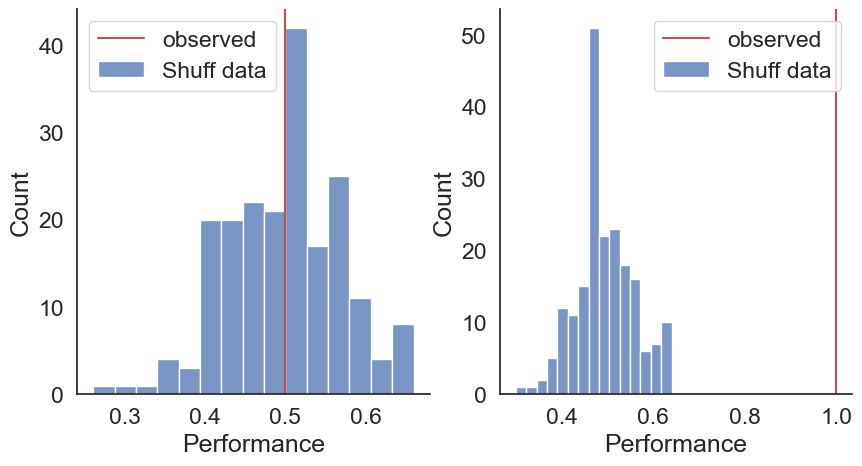

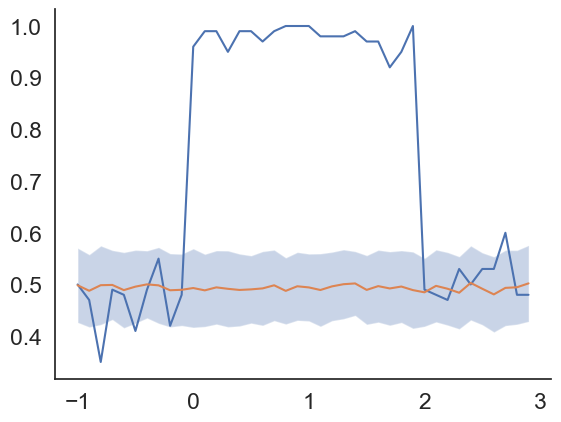

n_cells = 20, noise amplitude = 0.5, stim amplitude = 2.0


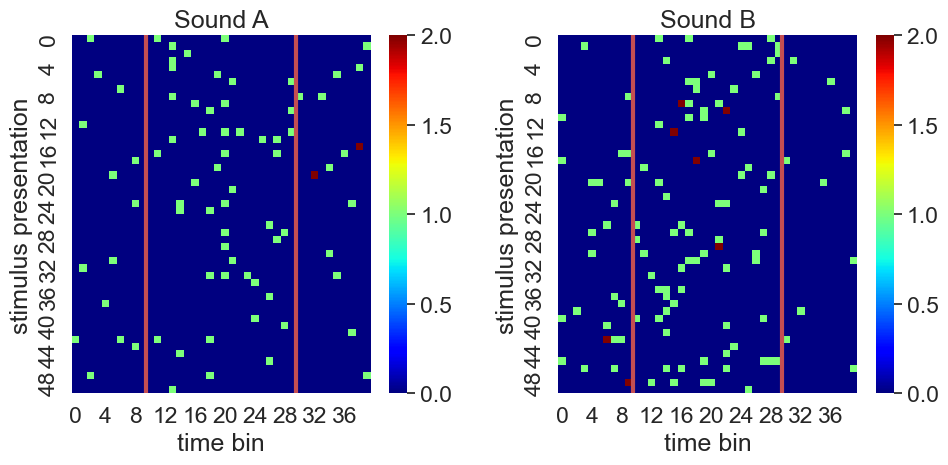

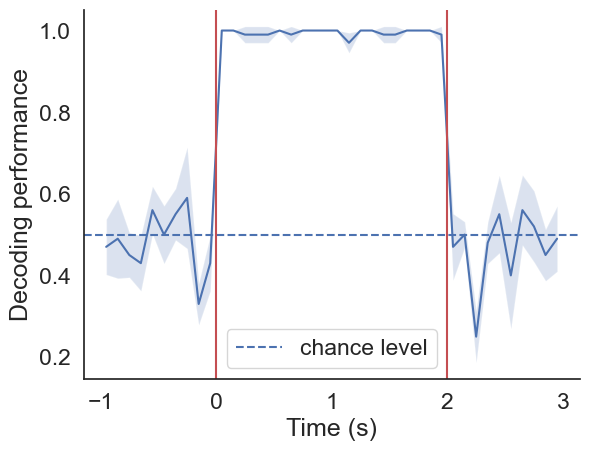

100%|██████████| 40/40 [00:06<00:00,  6.41it/s]


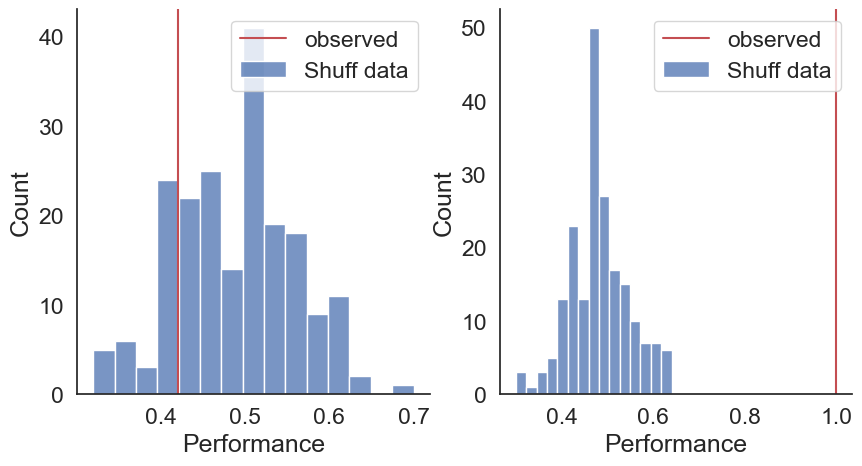

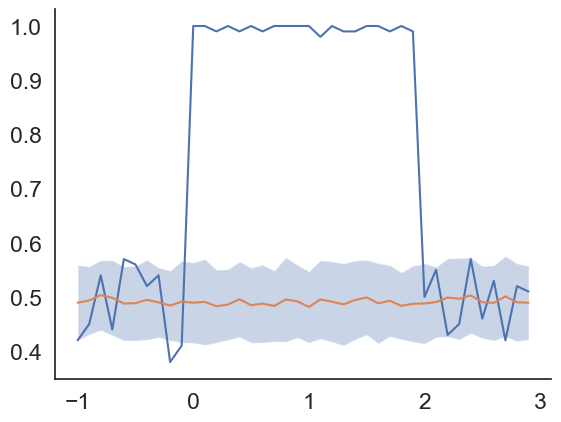

n_cells = 50, noise amplitude = 0.0, stim amplitude = 0.5


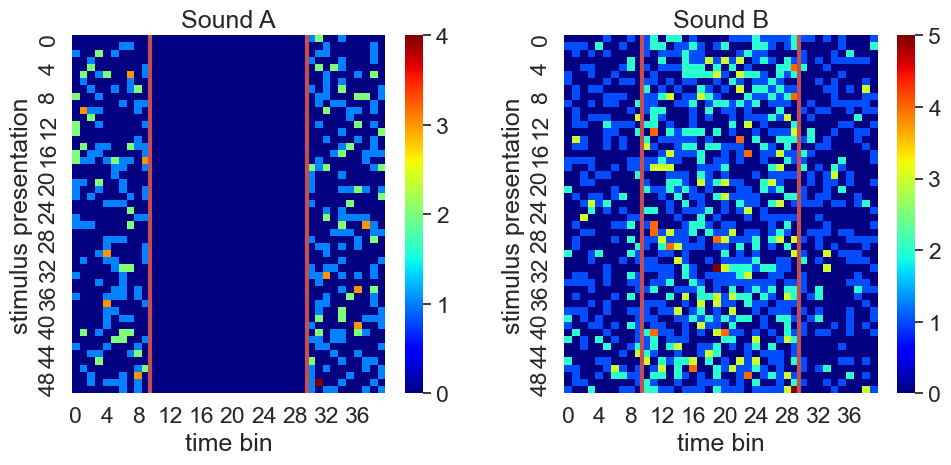

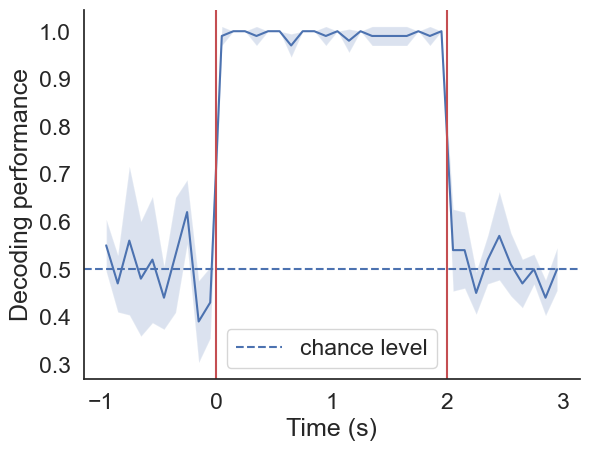

100%|██████████| 40/40 [00:10<00:00,  3.70it/s]


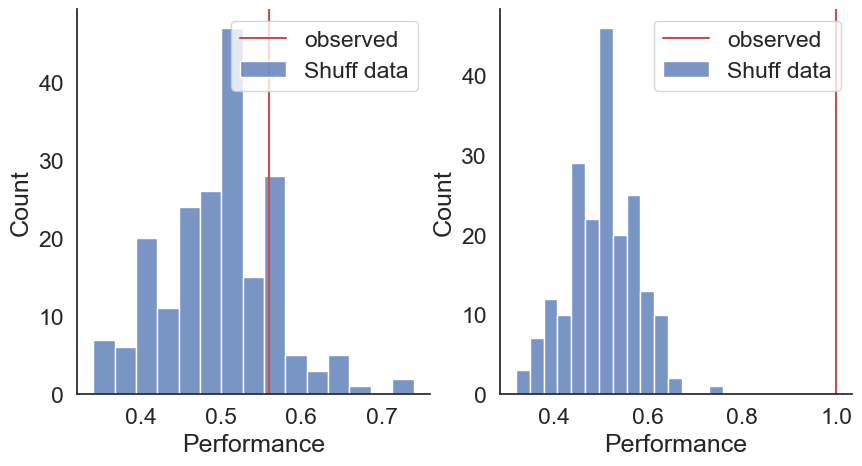

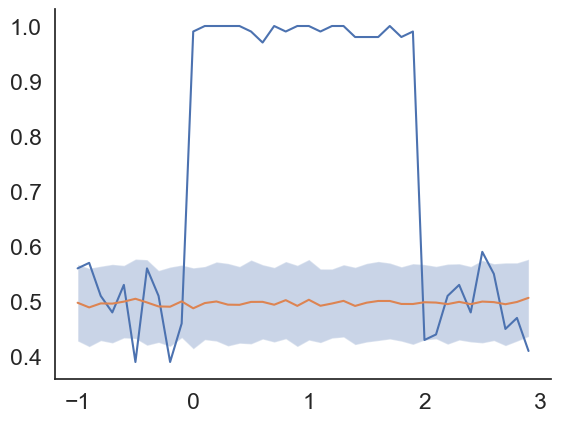

n_cells = 50, noise amplitude = 0.0, stim amplitude = 1.0


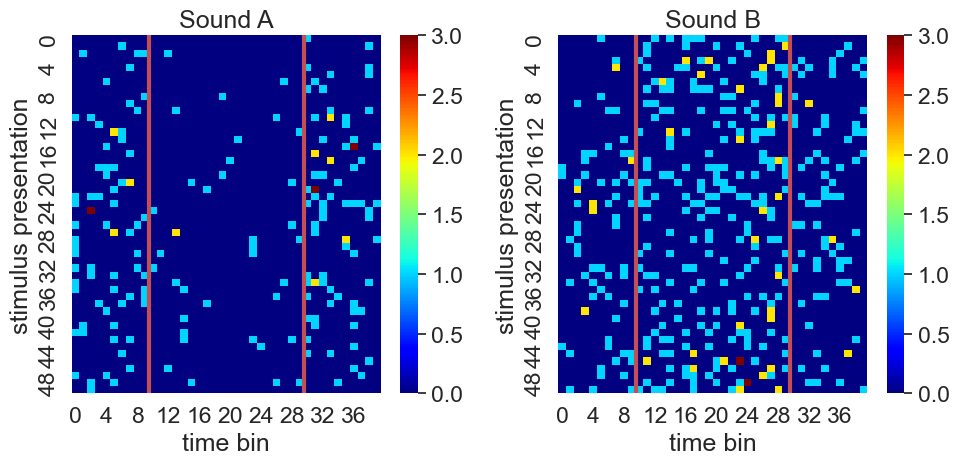

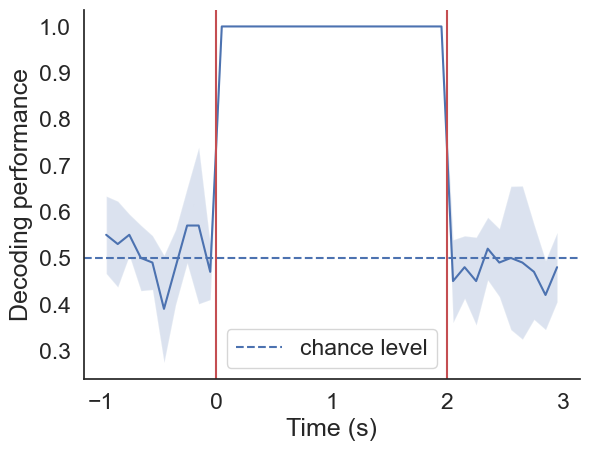

100%|██████████| 40/40 [00:10<00:00,  3.73it/s]


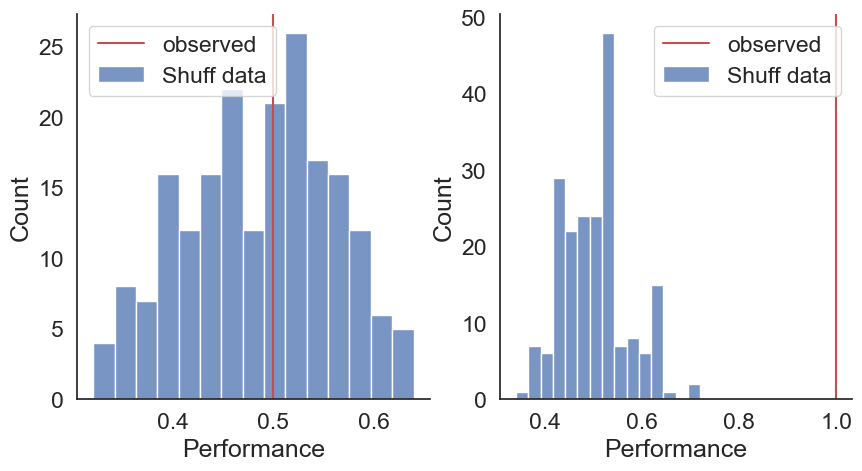

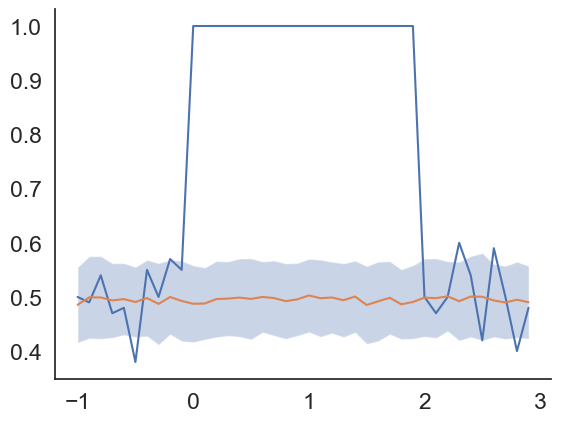

n_cells = 50, noise amplitude = 0.0, stim amplitude = 2.0


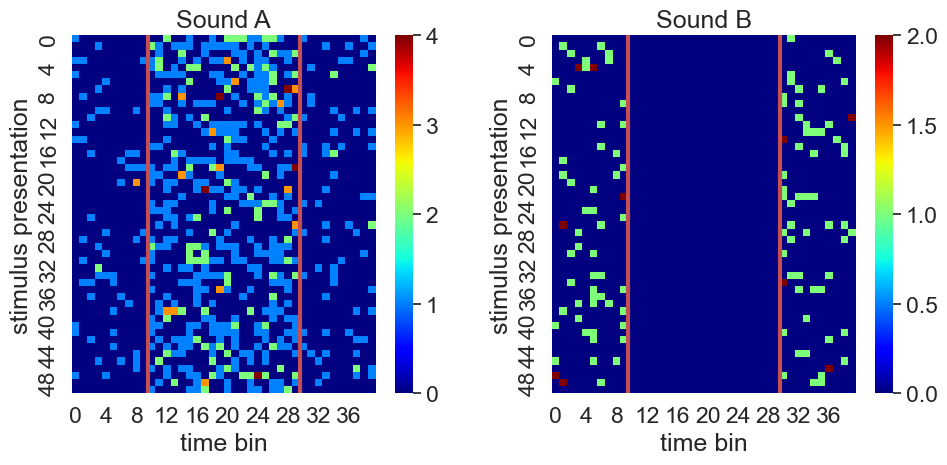

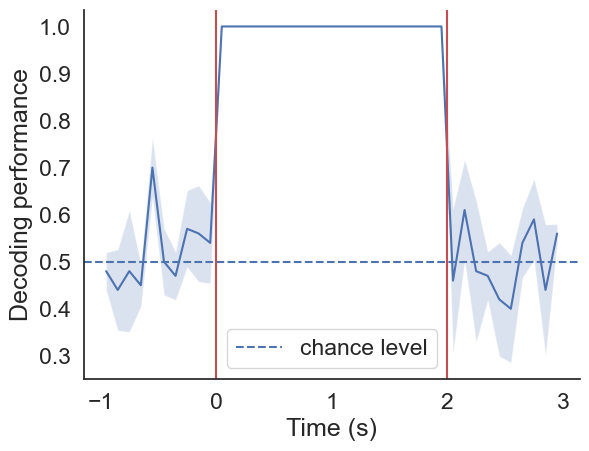

100%|██████████| 40/40 [00:13<00:00,  2.94it/s]


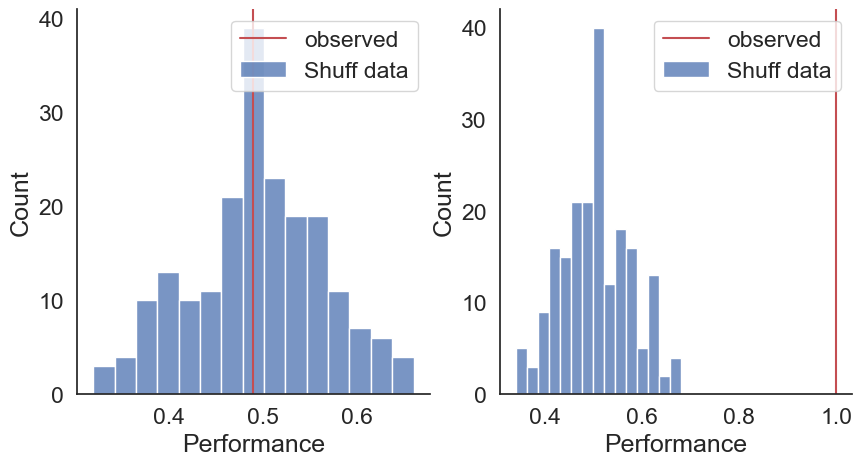

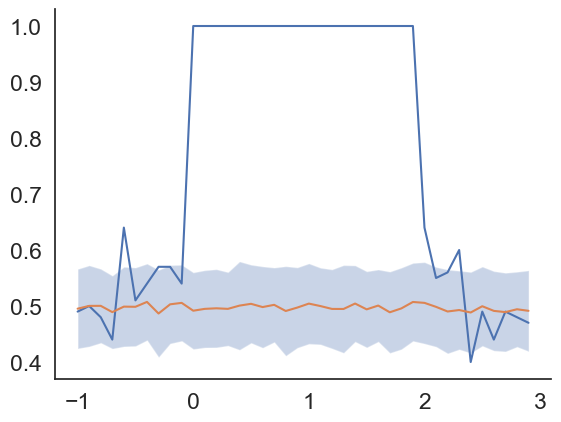

n_cells = 50, noise amplitude = 0.1, stim amplitude = 0.5


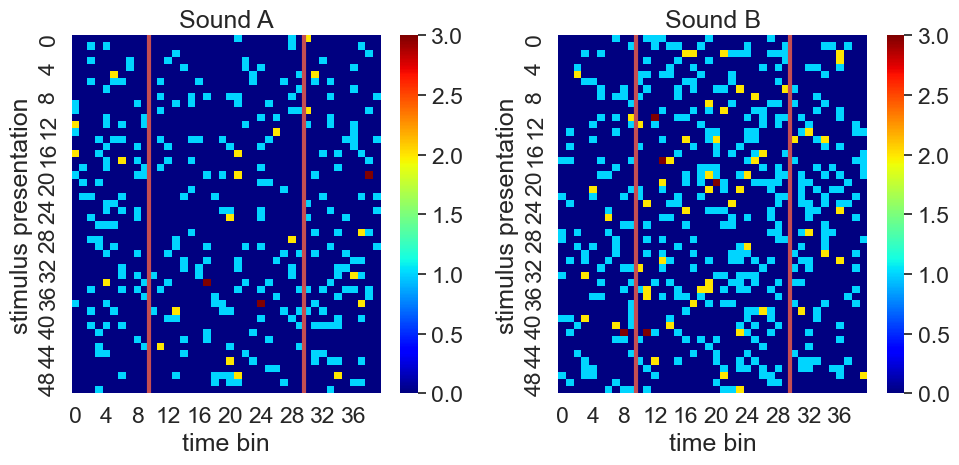

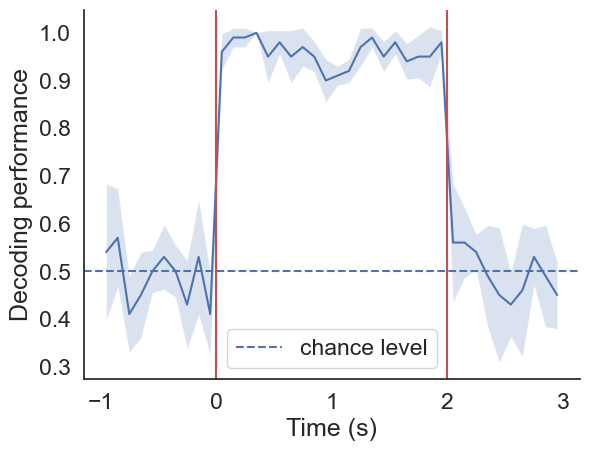

100%|██████████| 40/40 [00:10<00:00,  3.93it/s]


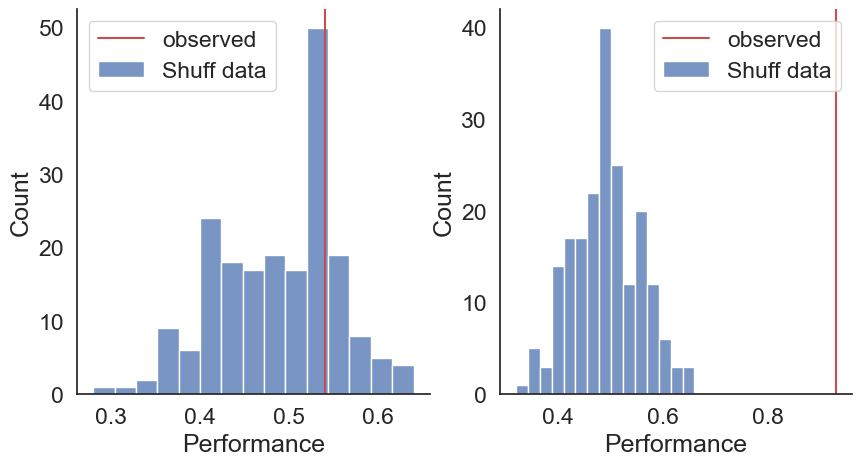

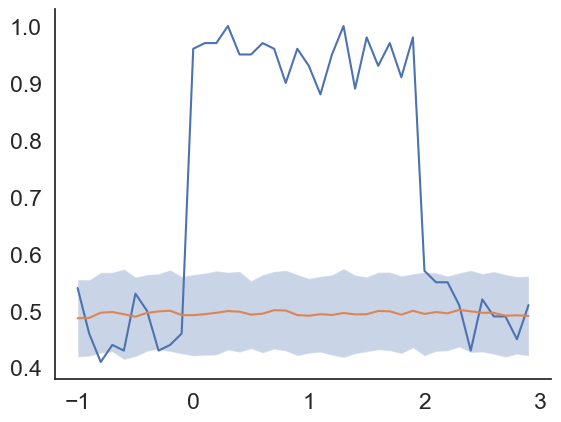

n_cells = 50, noise amplitude = 0.1, stim amplitude = 1.0


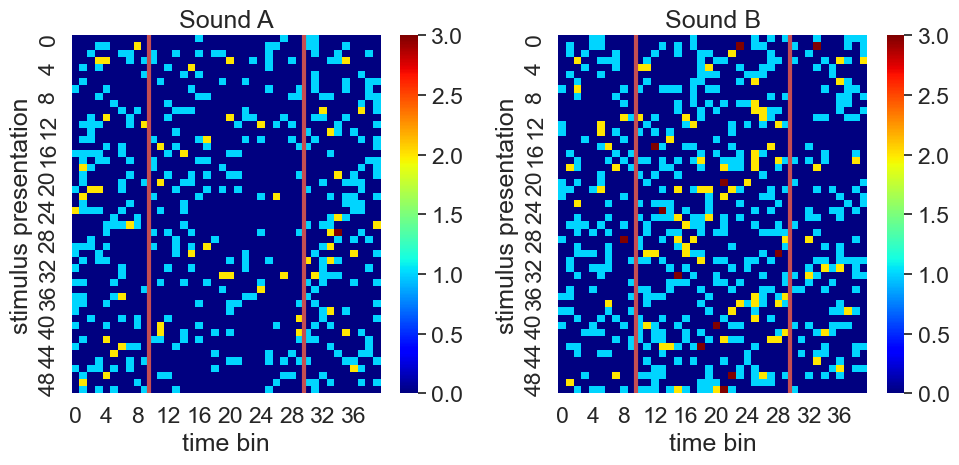

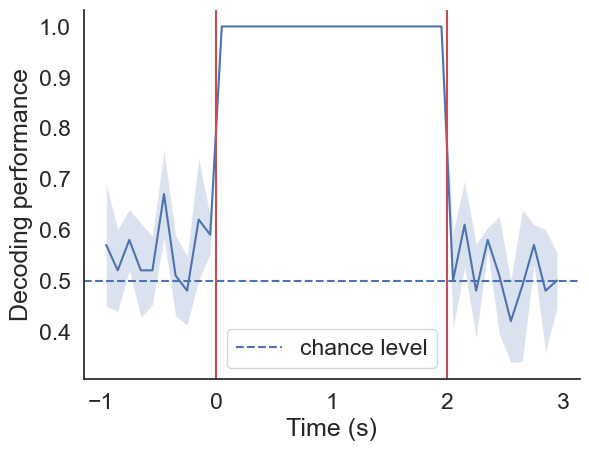

100%|██████████| 40/40 [00:10<00:00,  3.98it/s]


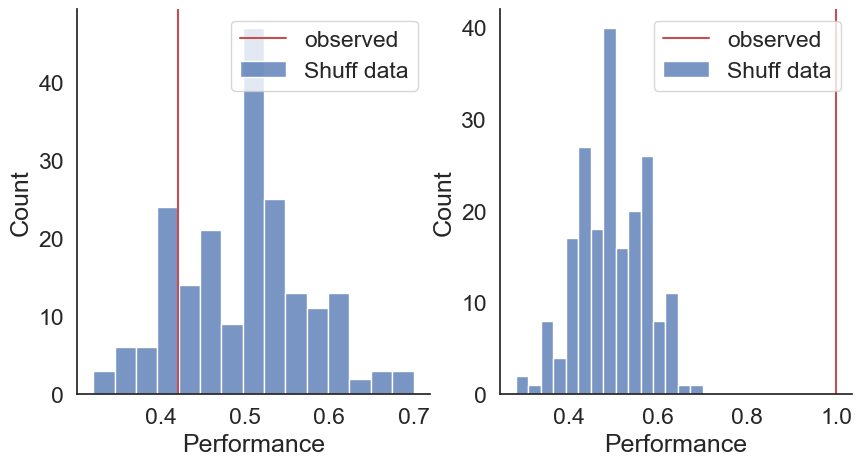

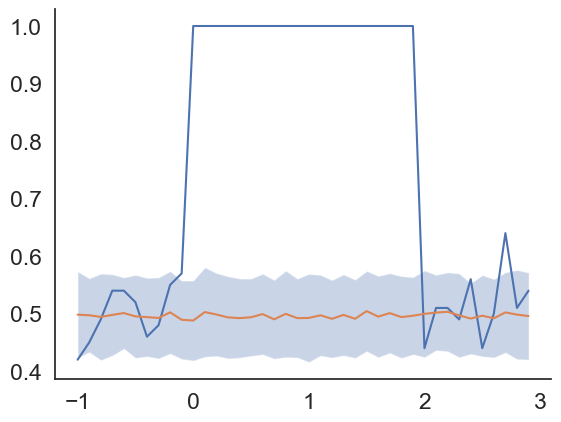

n_cells = 50, noise amplitude = 0.1, stim amplitude = 2.0


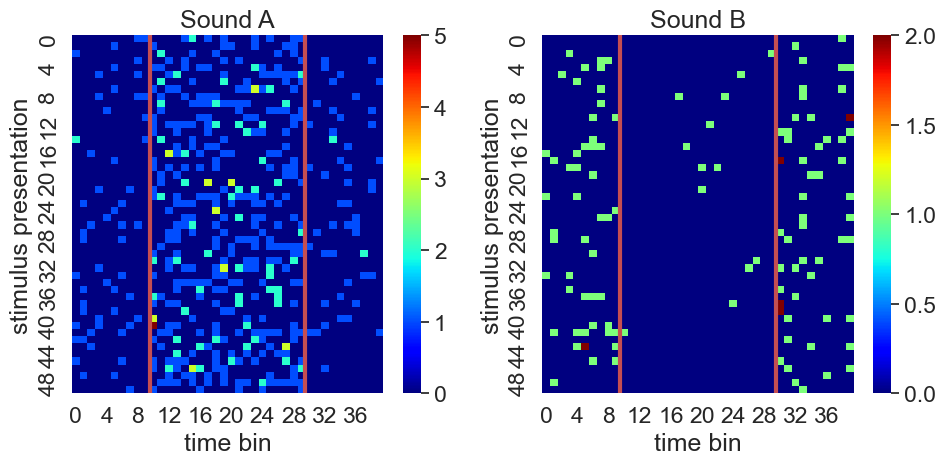

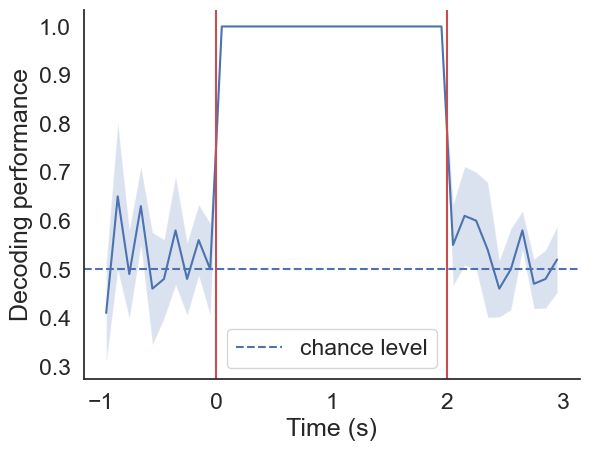

100%|██████████| 40/40 [00:13<00:00,  3.04it/s]


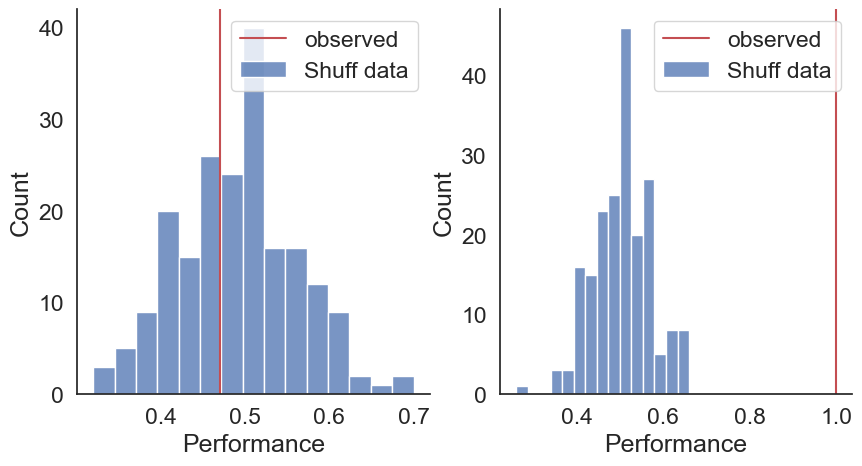

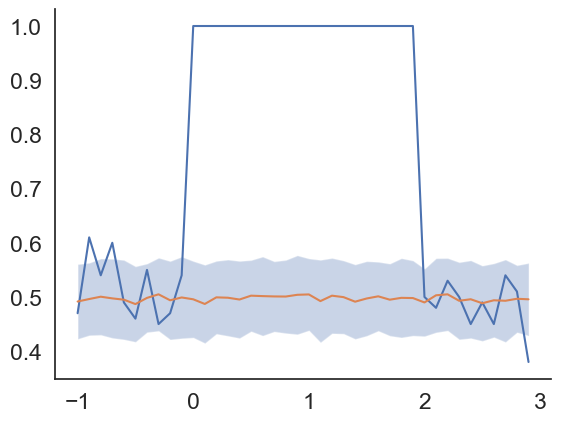

n_cells = 50, noise amplitude = 0.5, stim amplitude = 0.5


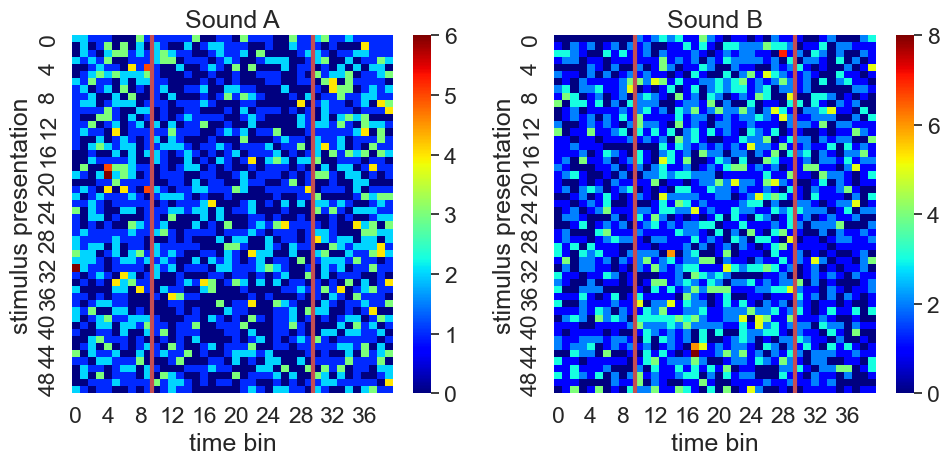

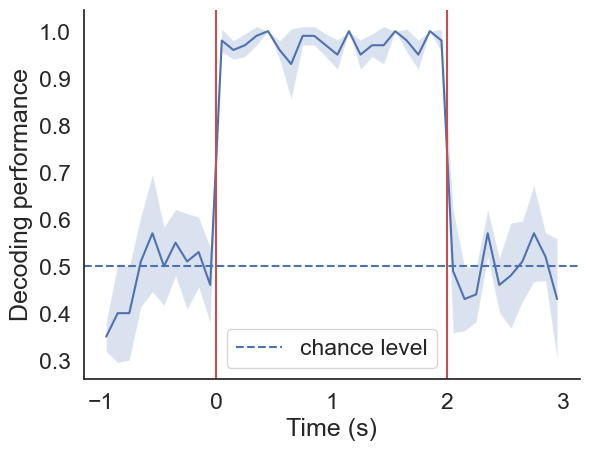

100%|██████████| 40/40 [00:12<00:00,  3.25it/s]


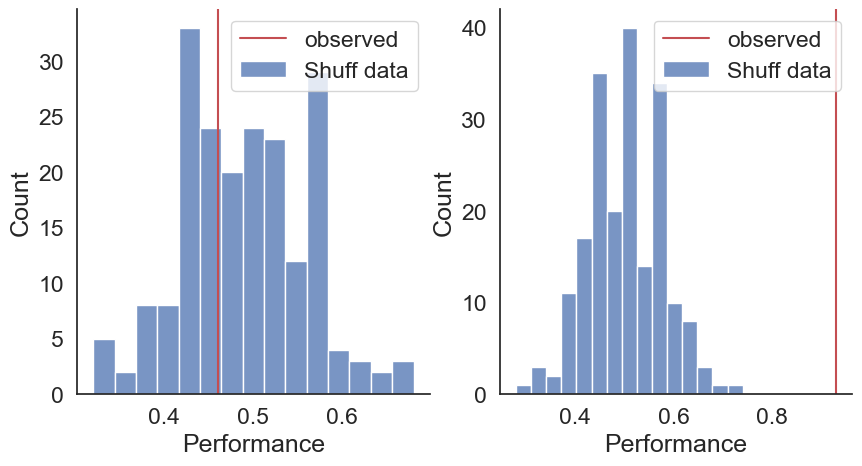

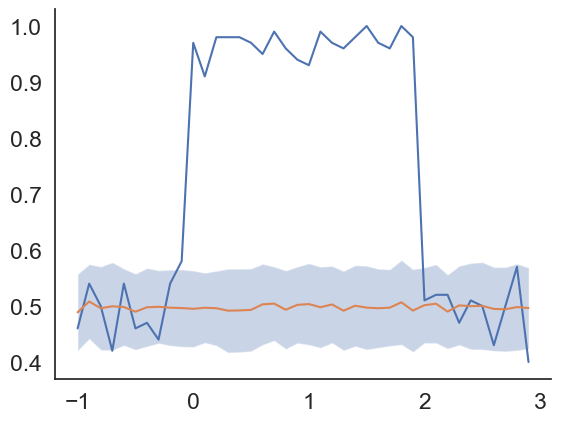

n_cells = 50, noise amplitude = 0.5, stim amplitude = 1.0


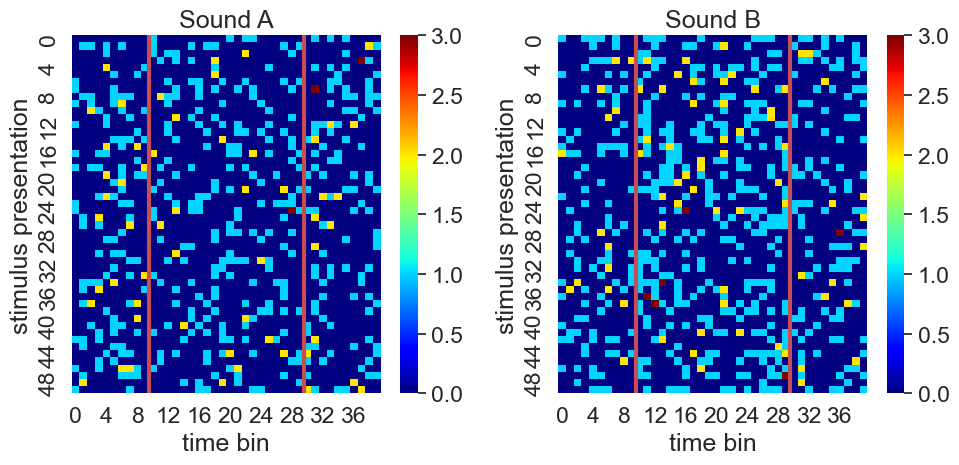

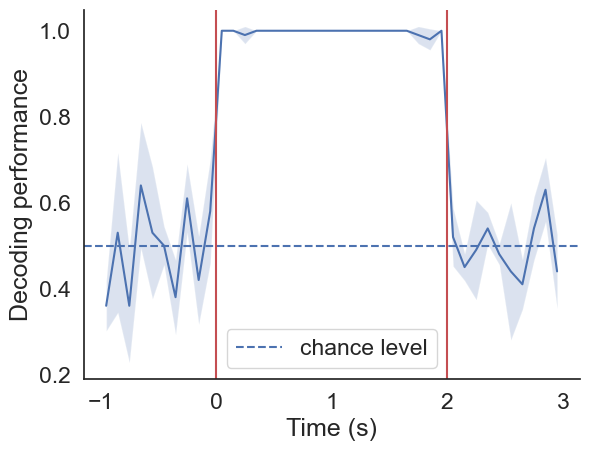

100%|██████████| 40/40 [00:09<00:00,  4.11it/s]


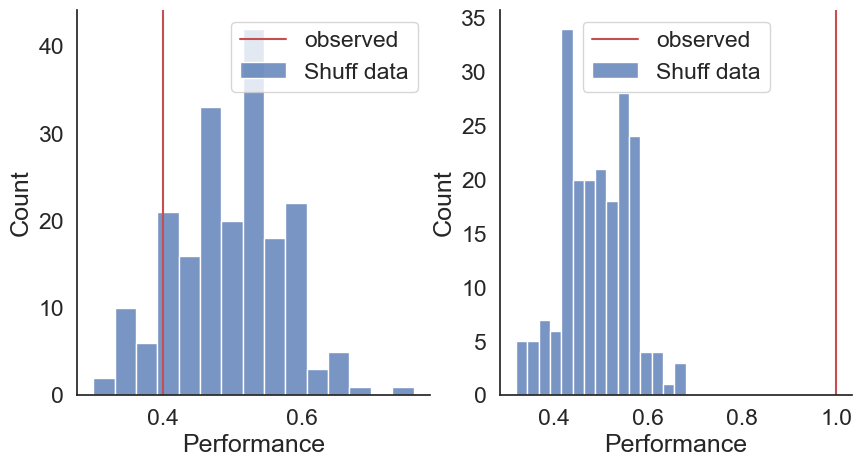

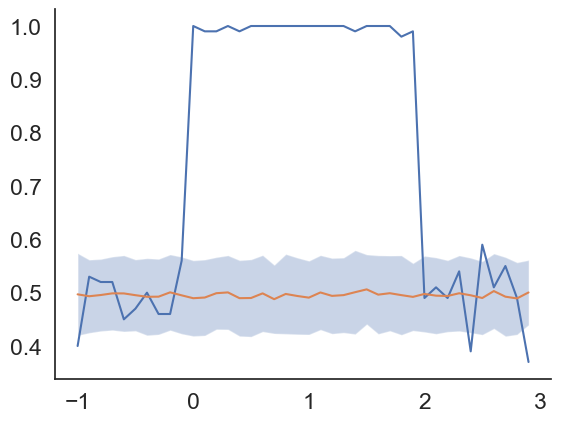

n_cells = 50, noise amplitude = 0.5, stim amplitude = 2.0


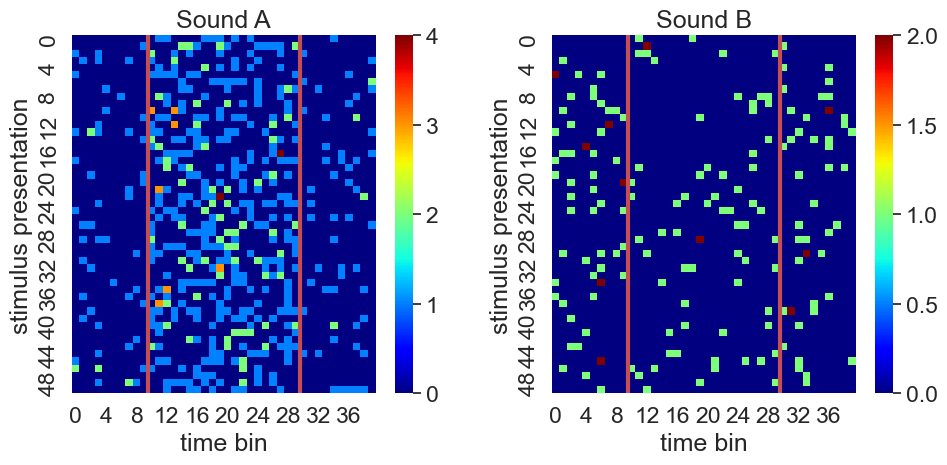

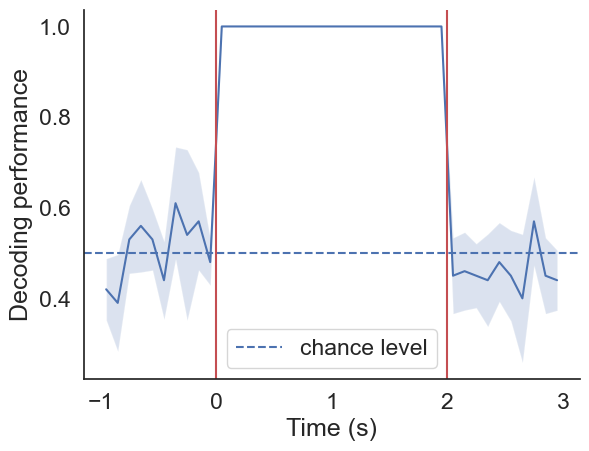

100%|██████████| 40/40 [00:12<00:00,  3.28it/s]


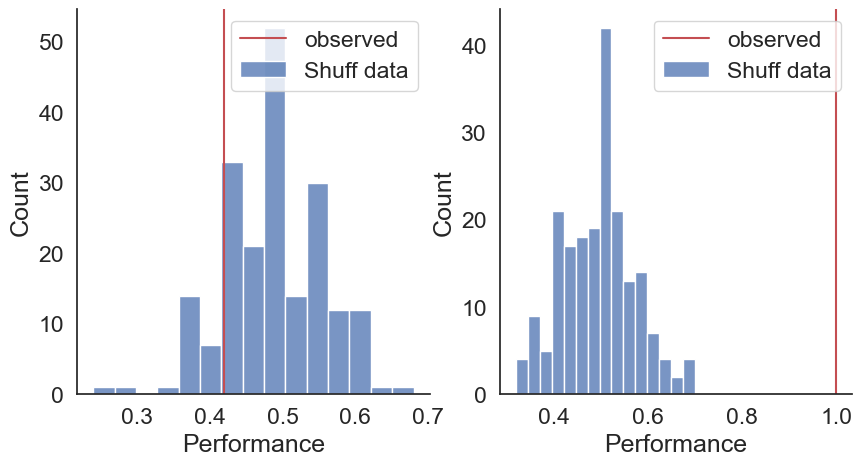

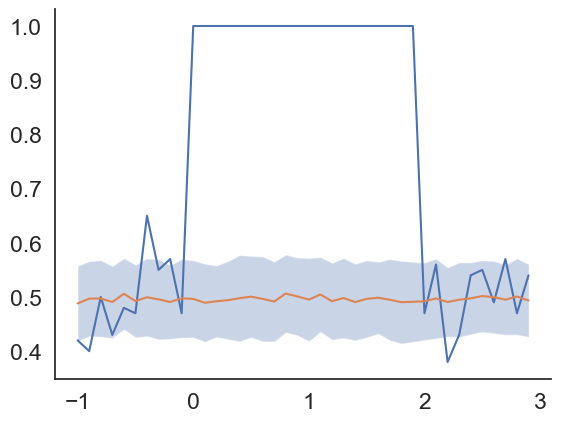

n_cells = 100, noise amplitude = 0.0, stim amplitude = 0.5


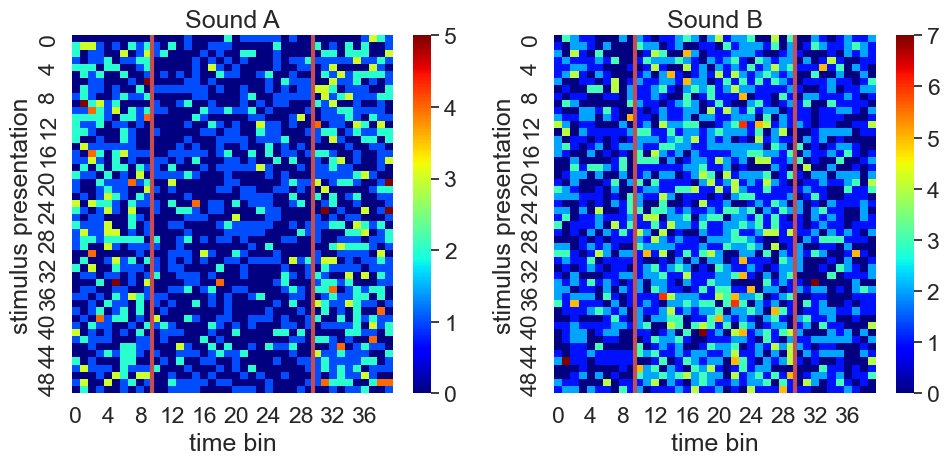

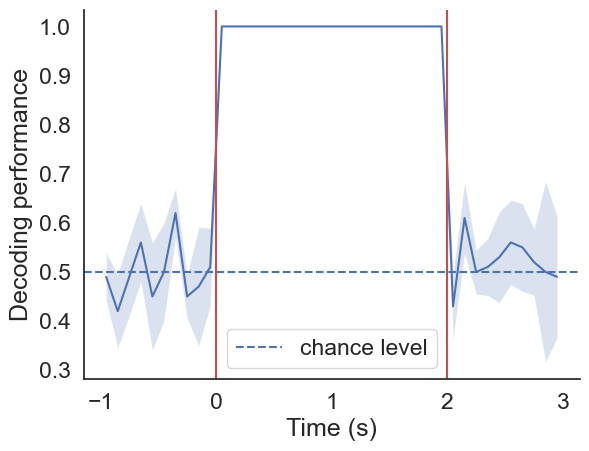

100%|██████████| 40/40 [00:07<00:00,  5.52it/s]


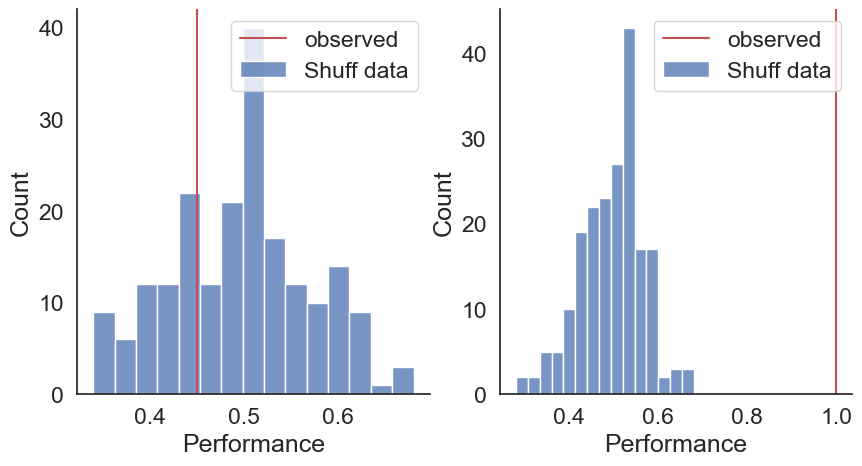

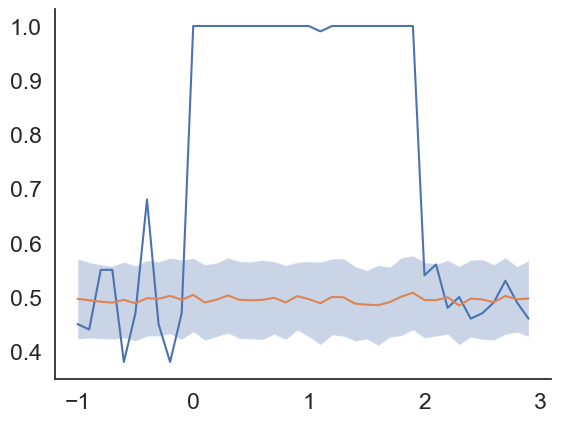

n_cells = 100, noise amplitude = 0.0, stim amplitude = 1.0


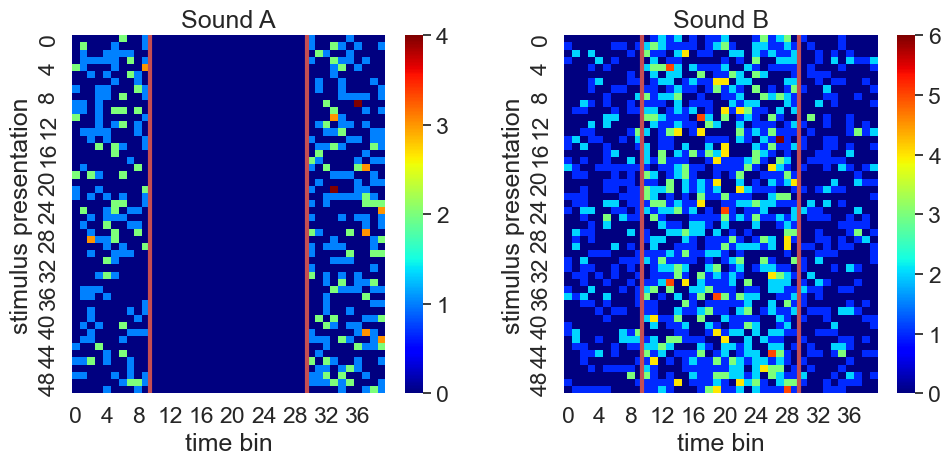

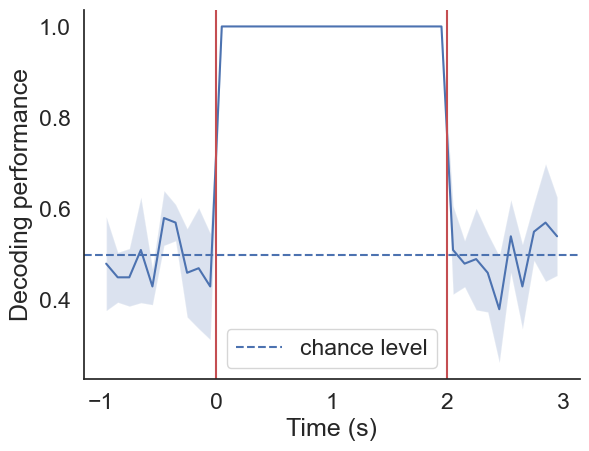

100%|██████████| 40/40 [00:07<00:00,  5.44it/s]


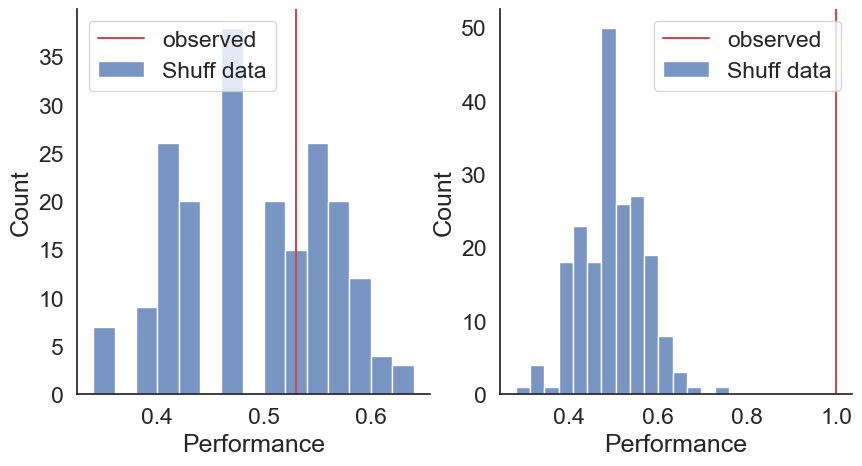

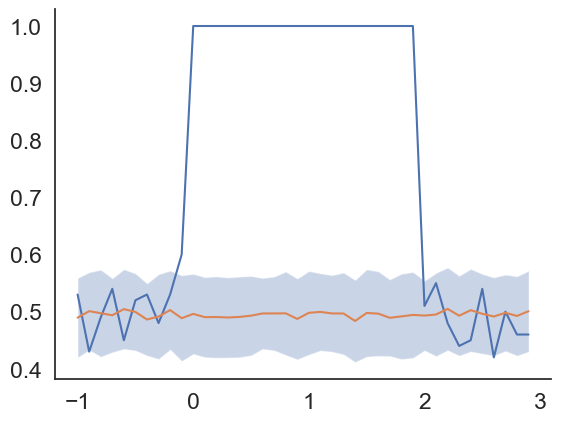

n_cells = 100, noise amplitude = 0.0, stim amplitude = 2.0


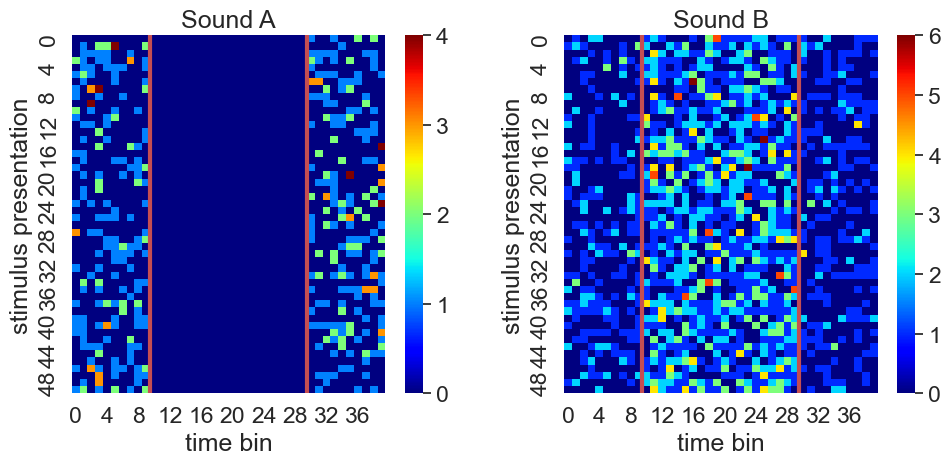

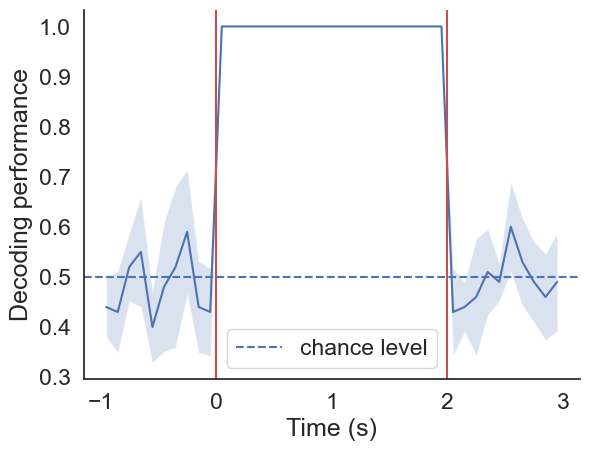

100%|██████████| 40/40 [00:07<00:00,  5.08it/s]


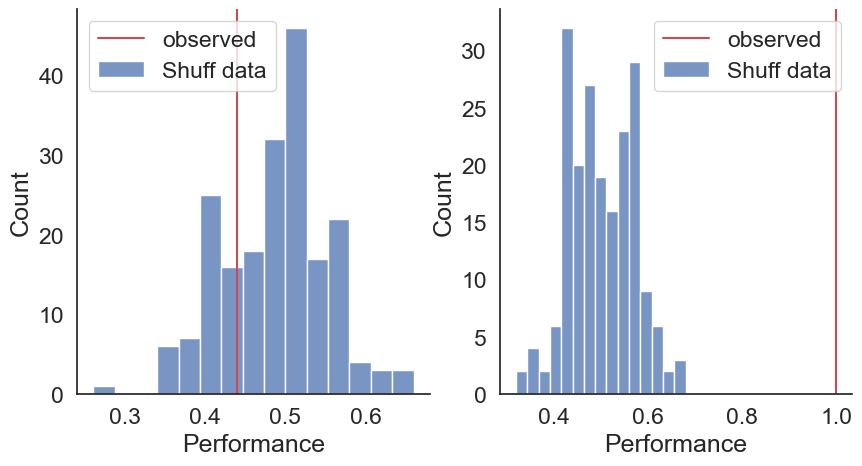

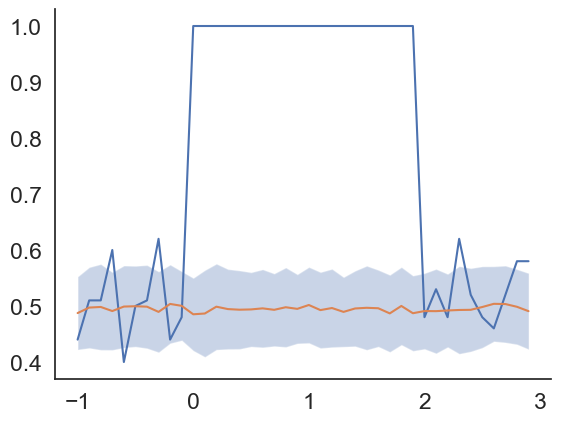

n_cells = 100, noise amplitude = 0.1, stim amplitude = 0.5


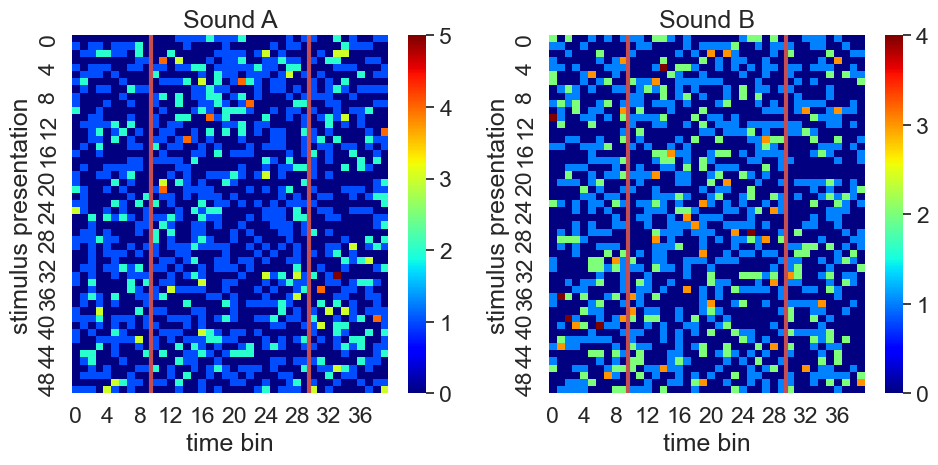

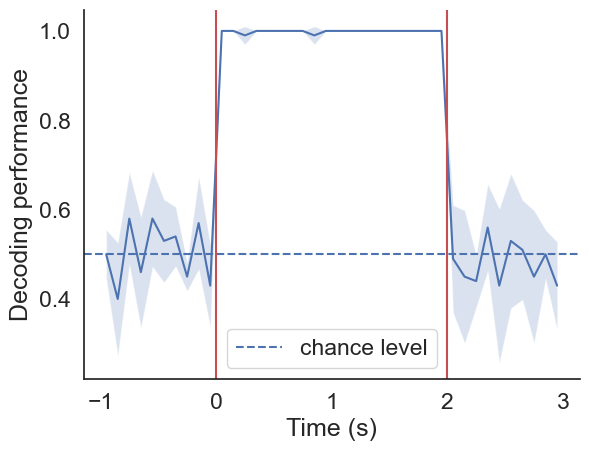

100%|██████████| 40/40 [00:06<00:00,  5.83it/s]


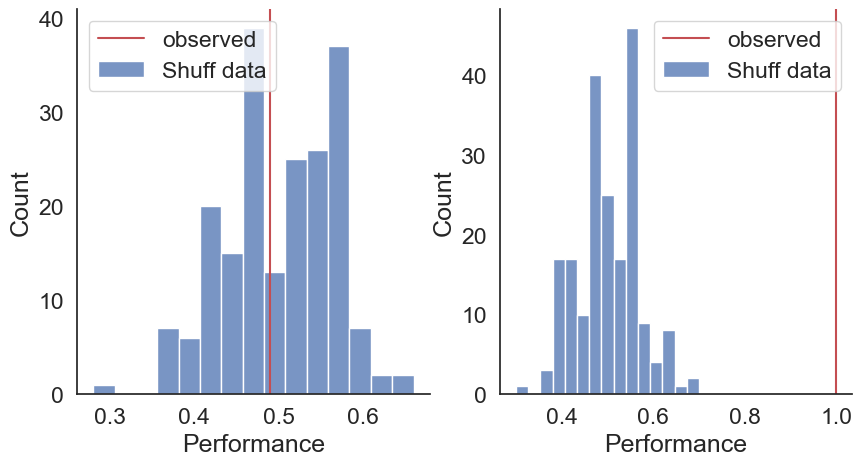

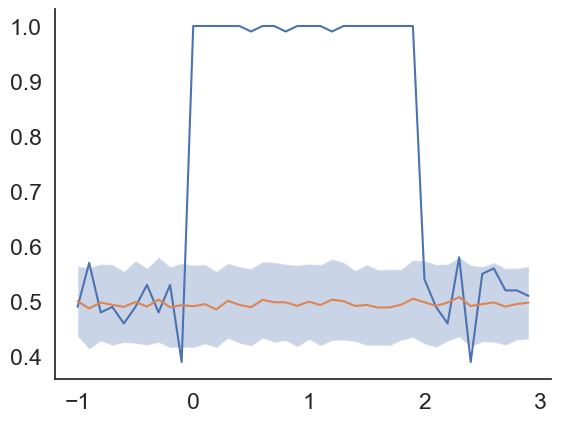

n_cells = 100, noise amplitude = 0.1, stim amplitude = 1.0


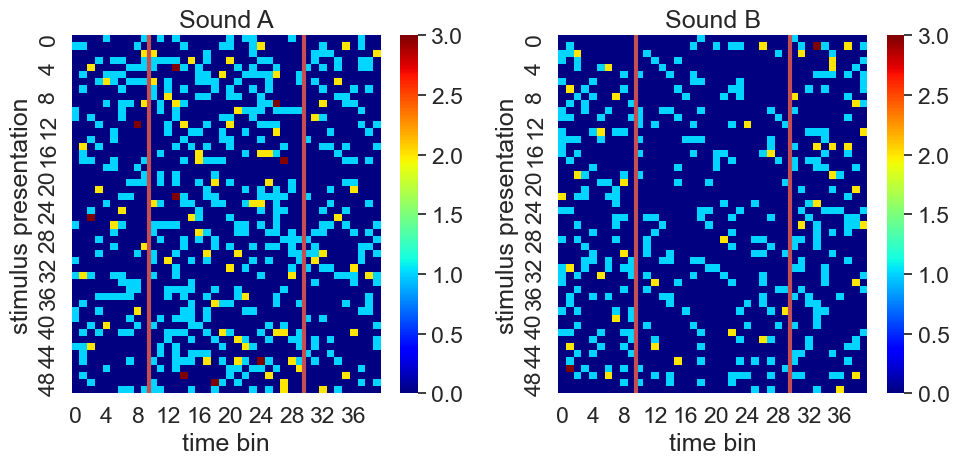

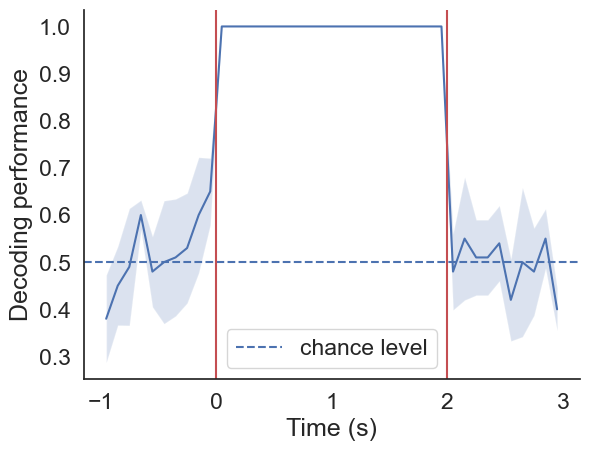

100%|██████████| 40/40 [00:06<00:00,  5.81it/s]


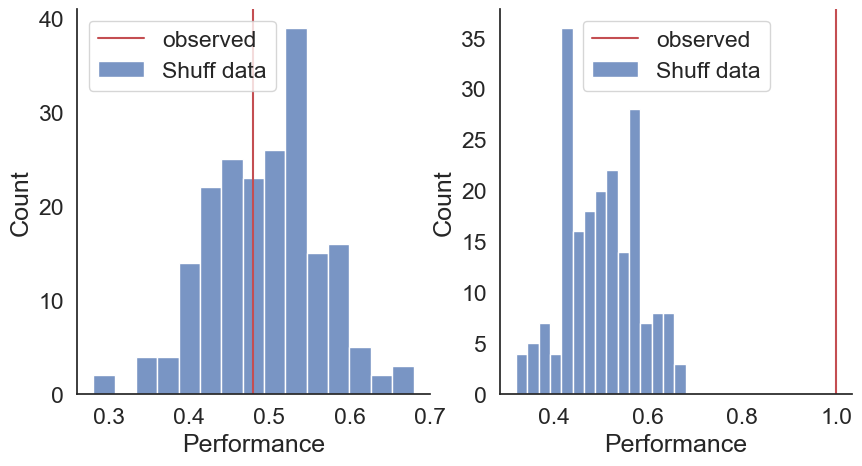

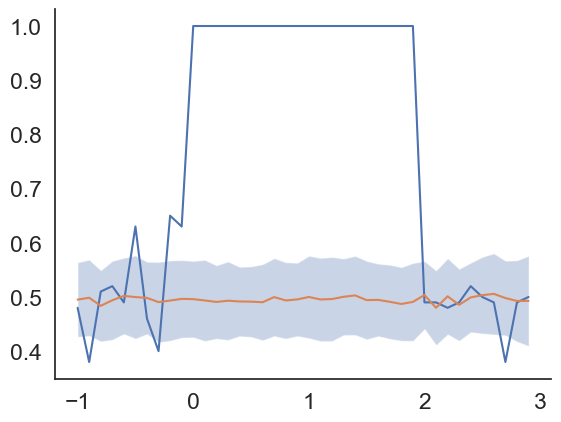

n_cells = 100, noise amplitude = 0.1, stim amplitude = 2.0


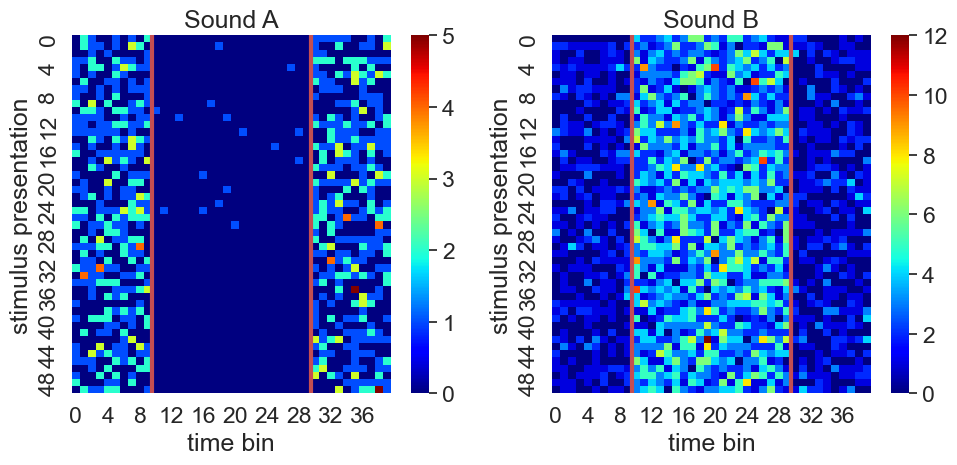

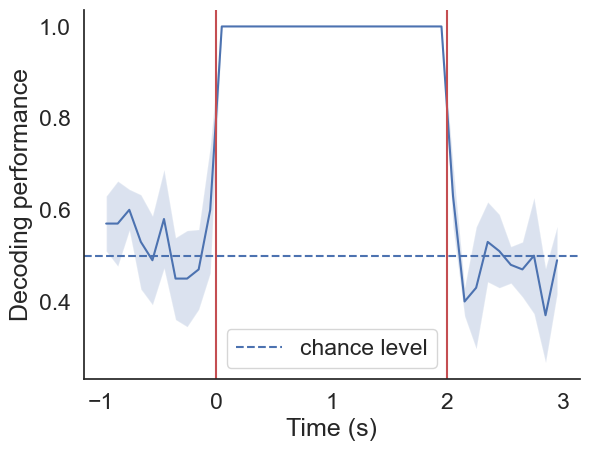

100%|██████████| 40/40 [00:08<00:00,  4.86it/s]


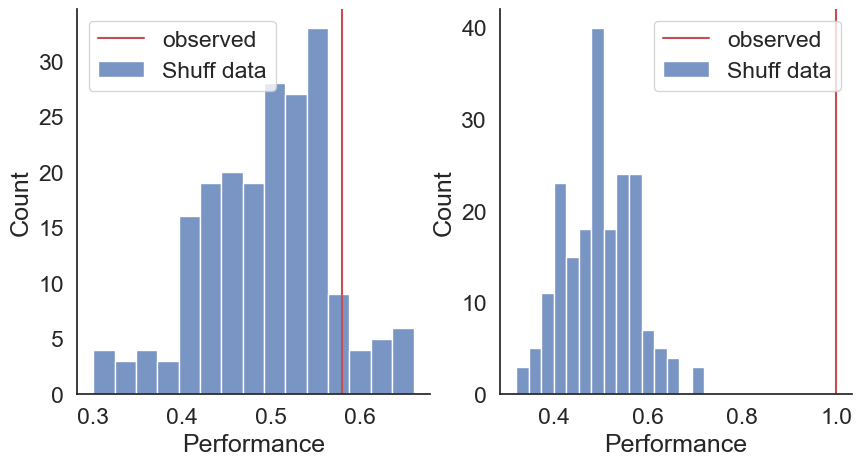

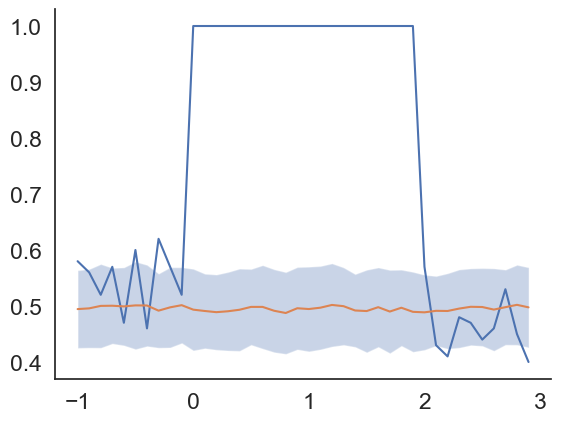

n_cells = 100, noise amplitude = 0.5, stim amplitude = 0.5


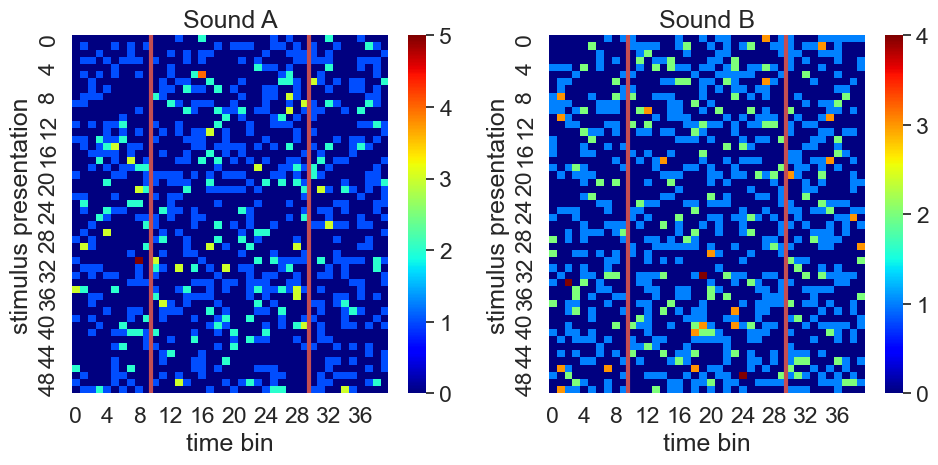

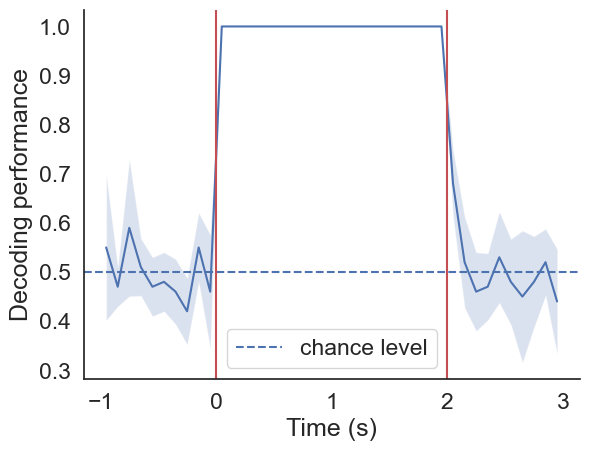

100%|██████████| 40/40 [00:06<00:00,  6.02it/s]


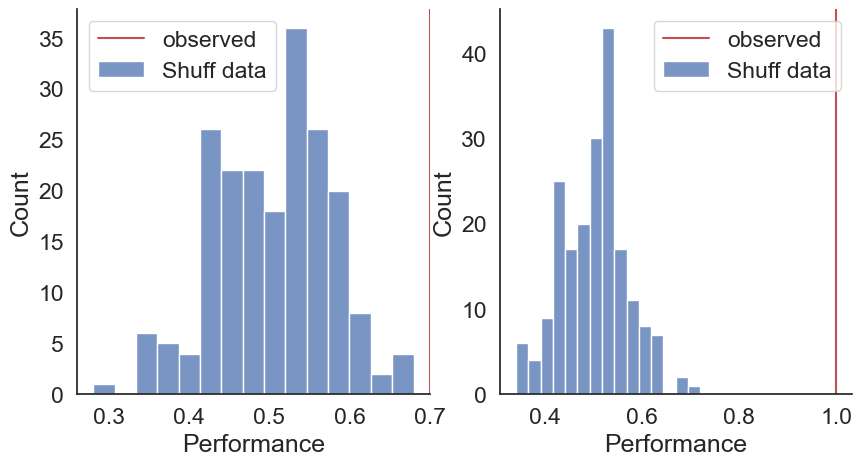

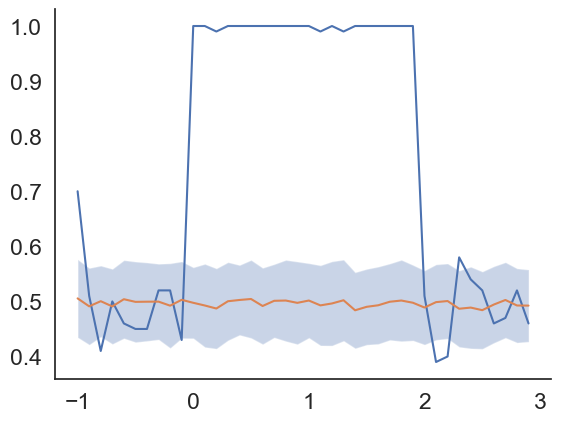

n_cells = 100, noise amplitude = 0.5, stim amplitude = 1.0


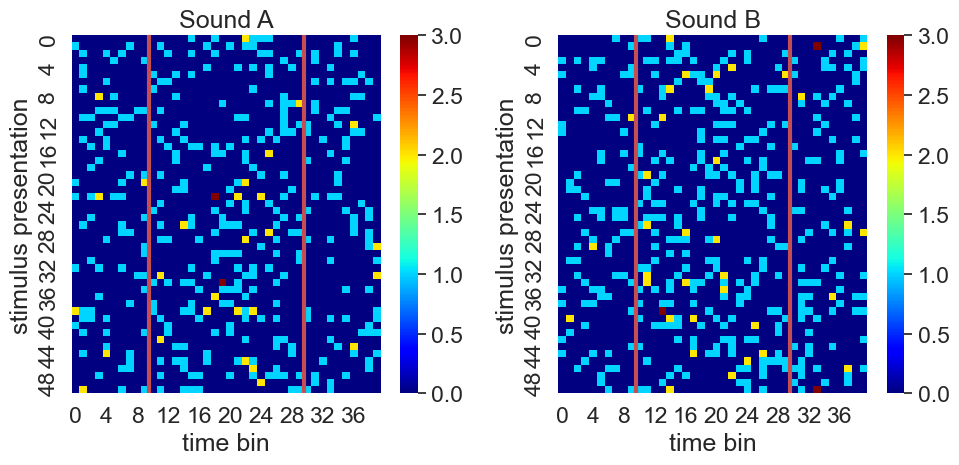

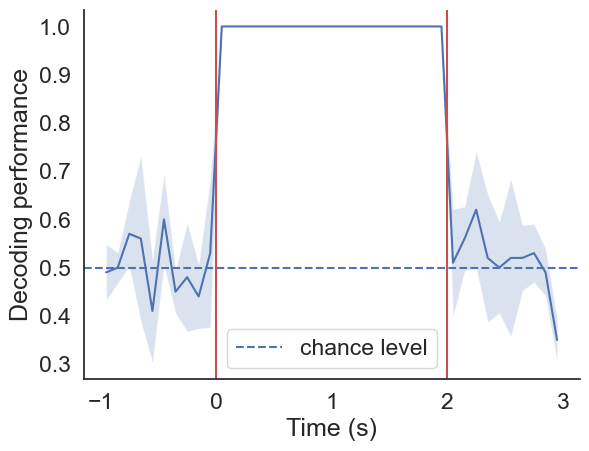

100%|██████████| 40/40 [00:07<00:00,  5.71it/s]


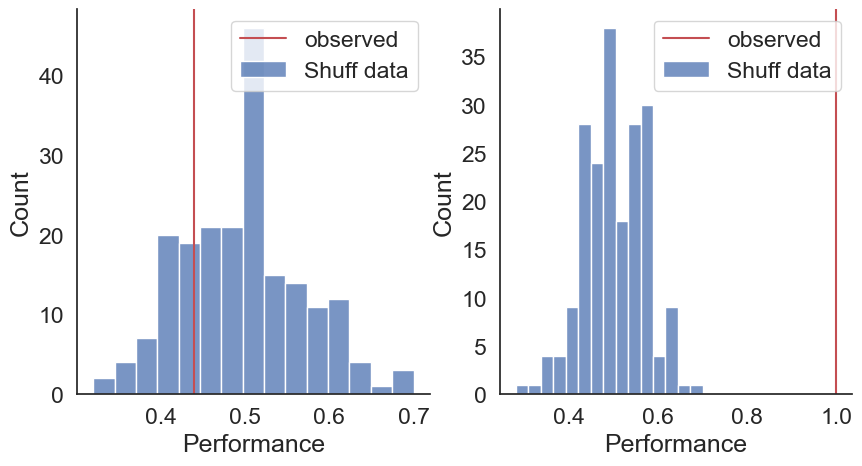

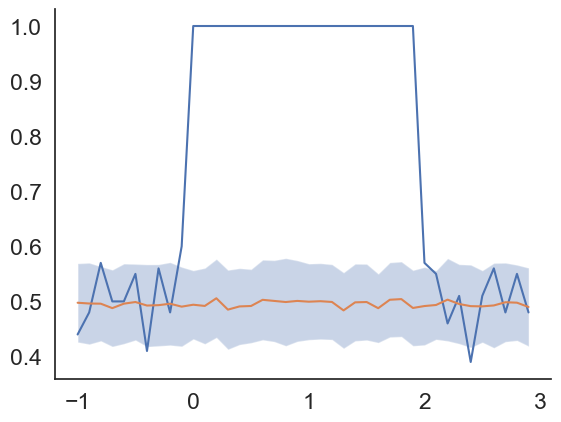

n_cells = 100, noise amplitude = 0.5, stim amplitude = 2.0


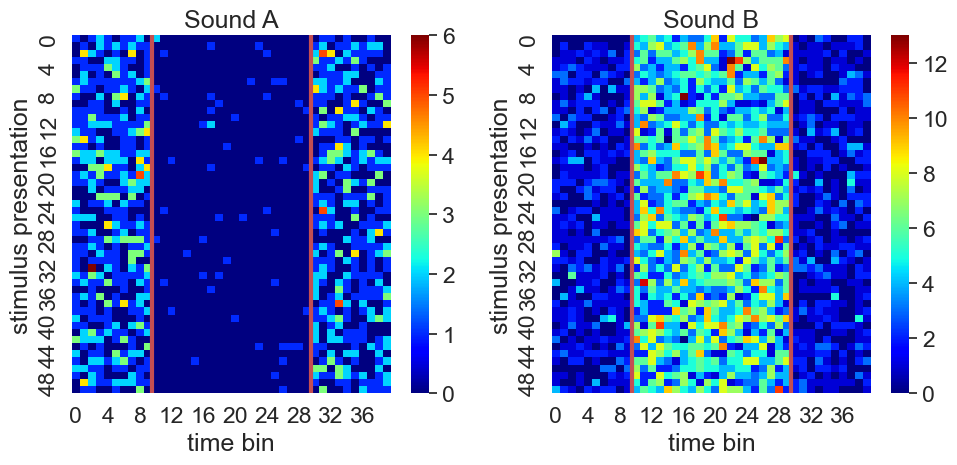

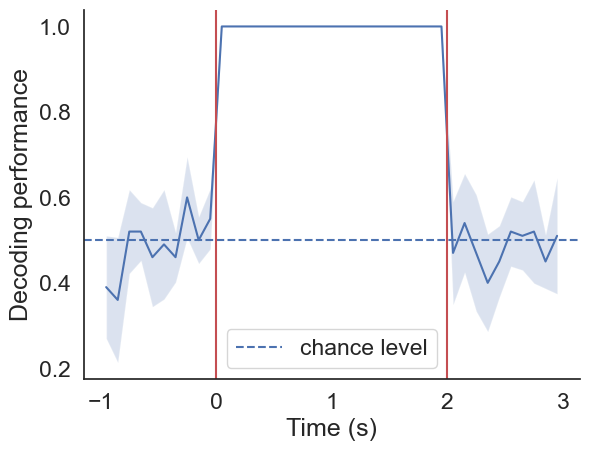

100%|██████████| 40/40 [00:09<00:00,  4.34it/s]


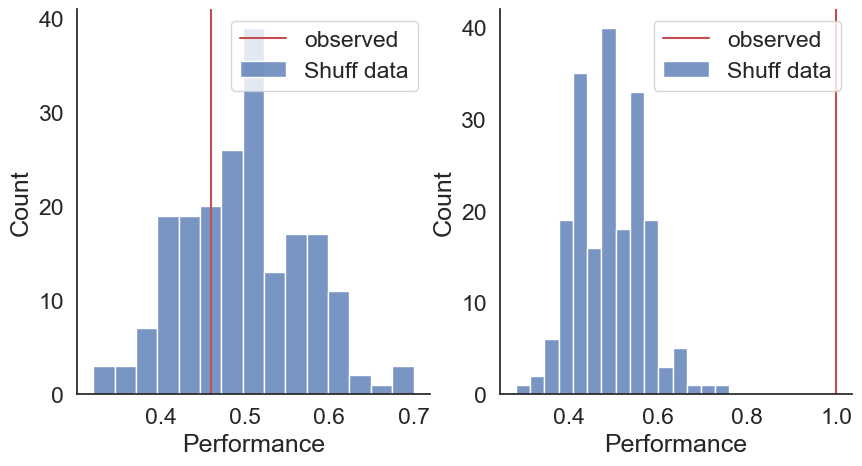

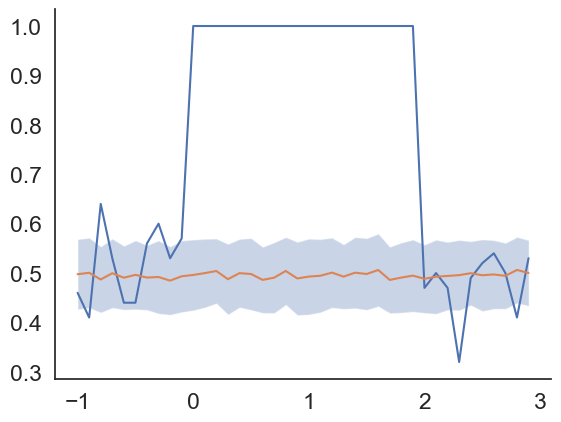

In [98]:
for n in n_cells:
    for a in a_noise:
        for s in a_stim:
            file_name = file_name = 'data/simulated_data_n'+str(n)+'_an'+str(a)+'_as'+str(s)+'.pickle'
            print(f"n_cells = {n}, noise amplitude = {a}, stim amplitude = {s}")
            analyze_data(file_name)

### Discussion

As to be expected, the performance of the decoding depends on number of neurons, amplitude of modulation and noise level. While a higher number of neurons and higher amplitude correspond to more information being available, a higher noise level reduces the information, decreasing the decoding performance. However, for all the levels that I simulated, the decoding performance was better than random decoding. I would expect this to break down for either very small number of neurons with sufficient noise levels, or very low signal to noise ratios.